In [2]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import requests
from census import Census
import json
import os

# Census API Key
from config import api_key

c = Census(api_key, year=2019)

In [3]:
#Define file paths
bexarcsvpath = os.path.join("Bexar_County_COVID-19_Data_by_Zip_Code.csv")
#censuscsvpath = os.path.join("2019_Data1.csv")

# read in CSV files
bexar_countydata = pd.read_csv(bexarcsvpath)
#censusdata = pd.read_csv(censuscsvpath)
#display(bexar_countydata)
#display(censusdata)

In [4]:
# Run Census Search to retrieve data on all zip codes (2019 ACS5 Census)
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels
census_race = c.acs5.get(("B02001_001E","B03002_003E","B03003_002E","B03003_003E","B02001_001E","B02001_002E",
                          "B02001_003E","B02001_004E","B02001_005E","B02001_006E","B02001_007E","B02001_008E",
                          "B02001_009E","B02001_010E"),{'for': 'zip code tabulation area:*'})

In [5]:
# Hispanic Origin Data Pull
hispanic_race = c.acs5.get(("B03002_001E","B03002_002E","B03002_003E","B03002_004E","B03002_005E","B03002_006E","B03002_007E",
                           "B03002_008E","B03002_009E","B03002_010E","B03002_011E","B03002_012E","B03002_013E","B03002_014E",
                           "B03002_015E","B03002_016E","B03002_017E","B03002_018E","B03002_019E","B03002_020E","B03002_021E",
                           ),{'for': 'zip code tabulation area:*'})

In [6]:
# json conversion to dataframe
hispanic_race = pd.DataFrame(hispanic_race)
hispanic_race = hispanic_race.rename(columns={"zip code tabulation area":"ZipInt"})
hispanic_race["ZipInt"] = hispanic_race["ZipInt"].astype(str).astype(int)
hispanic_merge = pd.merge(hispanic_race, bexar_countydata, on="ZipInt",how="right")
hispanic_merge.drop(columns=["state"])
display(hispanic_merge)
hispanic_race.columns


,B03002_001E,B03002_002E,B03002_003E,B03002_004E,B03002_005E,B03002_006E,B03002_007E,B03002_008E,B03002_009E,B03002_010E,...,ZipInt,OBJECTID,ZIP_CODE,populationtotals_totpop_cy,Positive,CasesP100000,ActiveCases,ActiveCaseRate,SHAPE_Length,SHAPE_Area
0,6833.0,1266.0,1161.0,36.0,15.0,35.0,0.0,0.0,19.0,0.0,...,78002,1,78002,9061,1063,11816.362830,6,66.696309,0.427542,0.009546
1,36056.0,27579.0,26416.0,245.0,57.0,169.0,80.0,0.0,612.0,0.0,...,78006,2,78006,5243,278,4851.657941,3,52.356021,0.552725,0.005416
2,15811.0,12588.0,11368.0,415.0,0.0,253.0,0.0,67.0,485.0,0.0,...,78015,4,78015,12254,664,5167.315175,7,54.474708,0.278955,0.002312
3,31357.0,18040.0,14668.0,825.0,98.0,1741.0,77.0,11.0,620.0,0.0,...,78023,5,78023,29569,1947,6588.163638,15,50.756268,0.886455,0.017922
4,6769.0,2483.0,2416.0,0.0,3.0,0.0,0.0,0.0,64.0,0.0,...,78052,7,78052,699,39,5555.555556,3,427.350427,0.260085,0.001147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,26301.0,18064.0,15115.0,1258.0,49.0,1220.0,27.0,0.0,395.0,45.0,...,78260,82,78260,36255,2654,7180.735931,17,45.995671,0.407156,0.005818
72,16749.0,10427.0,8632.0,775.0,13.0,416.0,26.0,49.0,516.0,47.0,...,78261,83,78261,23828,1836,7514.427209,13,53.206729,0.474302,0.006743
73,4440.0,2873.0,2388.0,307.0,24.0,0.0,43.0,0.0,111.0,0.0,...,78263,84,78263,5228,428,8302.618817,1,19.398642,0.680812,0.010405
74,10623.0,2049.0,1606.0,179.0,0.0,77.0,0.0,9.0,178.0,0.0,...,78264,85,78264,13113,1439,10995.644530,13,99.335218,0.726860,0.016811


Index(['B03002_001E', 'B03002_002E', 'B03002_003E', 'B03002_004E',
       'B03002_005E', 'B03002_006E', 'B03002_007E', 'B03002_008E',
       'B03002_009E', 'B03002_010E', 'B03002_011E', 'B03002_012E',
       'B03002_013E', 'B03002_014E', 'B03002_015E', 'B03002_016E',
       'B03002_017E', 'B03002_018E', 'B03002_019E', 'B03002_020E',
       'B03002_021E', 'state', 'ZipInt'],
      dtype='object')

In [7]:
display(hispanic_race.columns.tolist())


['B03002_001E',
 'B03002_002E',
 'B03002_003E',
 'B03002_004E',
 'B03002_005E',
 'B03002_006E',
 'B03002_007E',
 'B03002_008E',
 'B03002_009E',
 'B03002_010E',
 'B03002_011E',
 'B03002_012E',
 'B03002_013E',
 'B03002_014E',
 'B03002_015E',
 'B03002_016E',
 'B03002_017E',
 'B03002_018E',
 'B03002_019E',
 'B03002_020E',
 'B03002_021E',
 'state',
 'ZipInt']

In [8]:
# Convert population counts by hispanic race to percent of county population by hispanic race 
hispanicpercents = hispanic_merge.copy()
hispanic_columnlist = ['B03002_002E','B03002_003E','B03002_004E','B03002_005E', 'B03002_006E',
              'B03002_007E','B03002_008E','B03002_009E','B03002_010E','B03002_011E', 'B03002_012E',
              'B03002_013E','B03002_014E','B03002_015E','B03002_016E','B03002_017E','B03002_018E',
              'B03002_019E','B03002_020E','B03002_021E']
for header in hispanic_columnlist:
    hispanicpercents[header] = hispanicpercents[header]/hispanicpercents['B03002_001E']*100
display(hispanicpercents)

,B03002_001E,B03002_002E,B03002_003E,B03002_004E,B03002_005E,B03002_006E,B03002_007E,B03002_008E,B03002_009E,B03002_010E,...,ZipInt,OBJECTID,ZIP_CODE,populationtotals_totpop_cy,Positive,CasesP100000,ActiveCases,ActiveCaseRate,SHAPE_Length,SHAPE_Area
0,6833.0,18.527733,16.991073,0.526855,0.219523,0.512220,0.000000,0.000000,0.278062,0.000000,...,78002,1,78002,9061,1063,11816.362830,6,66.696309,0.427542,0.009546
1,36056.0,76.489350,73.263812,0.679499,0.158087,0.468715,0.221877,0.000000,1.697360,0.000000,...,78006,2,78006,5243,278,4851.657941,3,52.356021,0.552725,0.005416
2,15811.0,79.615458,71.899311,2.624755,0.000000,1.600152,0.000000,0.423756,3.067485,0.000000,...,78015,4,78015,12254,664,5167.315175,7,54.474708,0.278955,0.002312
3,31357.0,57.531014,46.777434,2.630991,0.312530,5.552189,0.245559,0.035080,1.977230,0.000000,...,78023,5,78023,29569,1947,6588.163638,15,50.756268,0.886455,0.017922
4,6769.0,36.681932,35.692126,0.000000,0.044320,0.000000,0.000000,0.000000,0.945487,0.000000,...,78052,7,78052,699,39,5555.555556,3,427.350427,0.260085,0.001147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,26301.0,68.681799,57.469298,4.783088,0.186305,4.638607,0.102658,0.000000,1.501844,0.171096,...,78260,82,78260,36255,2654,7180.735931,17,45.995671,0.407156,0.005818
72,16749.0,62.254463,51.537405,4.627142,0.077617,2.483730,0.155233,0.292555,3.080781,0.280614,...,78261,83,78261,23828,1836,7514.427209,13,53.206729,0.474302,0.006743
73,4440.0,64.707207,53.783784,6.914414,0.540541,0.000000,0.968468,0.000000,2.500000,0.000000,...,78263,84,78263,5228,428,8302.618817,1,19.398642,0.680812,0.010405
74,10623.0,19.288337,15.118140,1.685023,0.000000,0.724842,0.000000,0.084722,1.675610,0.000000,...,78264,85,78264,13113,1439,10995.644530,13,99.335218,0.726860,0.016811


In [9]:
# Convert to DataFrame
census_race = pd.DataFrame(census_race)

# Column Reordering
census_race = census_race.rename(columns={"B01003_001E": "Population",
                                          "B01002_001E": "Median Age",
                                          "B02001_001E":"Total Race Population",
                                          "B02001_002E":"White",
                                          "B02001_003E":"Black or African American",
                                          "B02001_004E":"America Native",
                                          "B02001_005E":"Asian",
                                          "B02001_006E":"Native Pacific",
                                          "B02001_007E":"Other",
                                          "B02001_008E":"Two or More",
                                          "B02001_009E":"Two or More Inclusive",
                                          "B02001_010E":"Three or More",
                                          "B19013_001E": "Household Income",
                                          "B19301_001E": "Per Capita Income",
                                          "B17001_002E": "Poverty Count",
                                          "B03003_002E": "Not Hispanic or Latino",
                                          "B03003_003E": "Hispanic or Latino",
                                          "NAME": "Name",
                                          "zip code tabulation area": "ZIP_CODE"})
display(census_race)

,Total Race Population,B03002_003E,Not Hispanic or Latino,Hispanic or Latino,White,Black or African American,America Native,Asian,Native Pacific,Other,Two or More,Two or More Inclusive,Three or More,state,ZIP_CODE
0,17113.0,53.0,61.0,17052.0,12616.0,182.0,32.0,2.0,0.0,4045.0,236.0,74.0,162.0,72,00601
1,37751.0,2540.0,2843.0,34908.0,32179.0,908.0,46.0,0.0,0.0,1194.0,3424.0,85.0,3339.0,72,00602
2,47081.0,788.0,1239.0,45842.0,37359.0,1514.0,68.0,108.0,11.0,7342.0,679.0,240.0,439.0,72,00603
3,6392.0,54.0,54.0,6338.0,2910.0,92.0,17.0,0.0,0.0,3299.0,74.0,53.0,21.0,72,00606
4,26686.0,1173.0,1318.0,25368.0,22042.0,461.0,0.0,0.0,1.0,2095.0,2087.0,33.0,2054.0,72,00610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33115,14.0,14.0,14.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02,99923
33116,908.0,441.0,875.0,33.0,461.0,6.0,306.0,6.0,7.0,0.0,122.0,0.0,122.0,02,99925
33117,1654.0,215.0,1557.0,97.0,241.0,0.0,1236.0,40.0,0.0,14.0,123.0,0.0,123.0,02,99926
33118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02,99927


In [10]:
#Merging
census_race["ZIP_CODE"] = census_race["ZIP_CODE"].astype(str).astype(int)
census_race = census_race.drop(columns=['state'])
bexar_countydata = bexar_countydata.drop(columns=['SHAPE_Length','SHAPE_Area','OBJECTID'])

In [11]:
merged_data = pd.merge(census_race,bexar_countydata, on="ZIP_CODE",how="right")

In [12]:
display(merged_data)
testlist = ["Total Race Population","White","Black or African American","America Native",
        "Asian","Native Pacific","Other","Two or More","Two or More Inclusive",
        "Three or More","Hispanic or Latino","Not Hispanic or Latino"]

,Total Race Population,B03002_003E,Not Hispanic or Latino,Hispanic or Latino,White,Black or African American,America Native,Asian,Native Pacific,Other,Two or More,Two or More Inclusive,Three or More,ZIP_CODE,populationtotals_totpop_cy,Positive,CasesP100000,ZipInt,ActiveCases,ActiveCaseRate
0,6833.0,1161.0,1266.0,5567.0,6105.0,41.0,15.0,35.0,0.0,566.0,71.0,52.0,19.0,78002,9061,1063,11816.362830,78002,6,66.696309
1,36056.0,26416.0,27579.0,8477.0,32669.0,296.0,174.0,169.0,80.0,1371.0,1297.0,199.0,1098.0,78006,5243,278,4851.657941,78006,3,52.356021
2,15811.0,11368.0,12588.0,3223.0,13945.0,415.0,47.0,253.0,0.0,466.0,685.0,71.0,614.0,78015,12254,664,5167.315175,78015,7,54.474708
3,31357.0,14668.0,18040.0,13317.0,25813.0,1002.0,185.0,1840.0,77.0,1112.0,1328.0,213.0,1115.0,78023,29569,1947,6588.163638,78023,15,50.756268
4,6769.0,2416.0,2483.0,4286.0,6502.0,0.0,3.0,0.0,0.0,102.0,162.0,0.0,162.0,78052,699,39,5555.555556,78052,3,427.350427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,26301.0,15115.0,18064.0,8237.0,22293.0,1295.0,65.0,1267.0,27.0,667.0,687.0,128.0,559.0,78260,36255,2654,7180.735931,78260,17,45.995671
72,16749.0,8632.0,10427.0,6322.0,13818.0,1057.0,31.0,435.0,26.0,461.0,921.0,171.0,750.0,78261,23828,1836,7514.427209,78261,13,53.206729
73,4440.0,2388.0,2873.0,1567.0,3549.0,416.0,57.0,0.0,43.0,257.0,118.0,7.0,111.0,78263,5228,428,8302.618817,78263,1,19.398642
74,10623.0,1606.0,2049.0,8574.0,9160.0,179.0,0.0,77.0,0.0,768.0,439.0,182.0,257.0,78264,13113,1439,10995.644530,78264,13,99.335218


In [13]:
merged_data.corr()

,Total Race Population,B03002_003E,Not Hispanic or Latino,Hispanic or Latino,White,Black or African American,America Native,Asian,Native Pacific,Other,Two or More,Two or More Inclusive,Three or More,ZIP_CODE,populationtotals_totpop_cy,Positive,CasesP100000,ZipInt,ActiveCases,ActiveCaseRate
Total Race Population,1.000000,0.674009,0.735818,0.877259,0.986244,0.569854,0.712106,0.579249,0.459609,0.707493,0.832076,0.874230,0.747319,0.239579,0.927487,0.854789,0.018383,0.239579,0.791409,0.004939
B03002_003E,0.674009,1.000000,0.966626,0.257640,0.652499,0.416268,0.202952,0.671129,0.475078,0.258639,0.777556,0.443537,0.805212,0.035951,0.546644,0.274128,-0.416051,0.035951,0.304553,-0.116945
Not Hispanic or Latino,0.735818,0.966626,1.000000,0.320445,0.680117,0.619465,0.239823,0.743118,0.551382,0.357465,0.864474,0.525711,0.885894,0.097050,0.624187,0.357123,-0.376648,0.097050,0.412335,-0.078631
Hispanic or Latino,0.877259,0.257640,0.320445,1.000000,0.897500,0.358030,0.826126,0.283520,0.252074,0.736282,0.551161,0.850261,0.417416,0.266340,0.854954,0.942570,0.292701,0.266340,0.814774,0.062646
White,0.986244,0.652499,0.680117,0.897500,1.000000,0.440331,0.730818,0.528492,0.392799,0.648830,0.767022,0.847303,0.677038,0.230614,0.916506,0.862522,0.047197,0.230614,0.770377,-0.005518
Black or African American,0.569854,0.416268,0.619465,0.358030,0.440331,1.000000,0.248173,0.397283,0.484339,0.522509,0.685701,0.497973,0.679518,0.173196,0.541520,0.435437,-0.086968,0.173196,0.538936,0.080263
America Native,0.712106,0.202952,0.239823,0.826126,0.730818,0.248173,1.000000,0.167275,0.245738,0.633986,0.451881,0.710563,0.338375,0.212685,0.684308,0.766061,0.283663,0.212685,0.659019,0.043465
Asian,0.579249,0.671129,0.743118,0.283520,0.528492,0.397283,0.167275,1.000000,0.424325,0.215345,0.647590,0.464150,0.643509,0.236830,0.547109,0.328594,-0.215556,0.236830,0.355949,-0.049765
Native Pacific,0.459609,0.475078,0.551382,0.252074,0.392799,0.484339,0.245738,0.424325,1.000000,0.382670,0.595923,0.444832,0.587099,0.045612,0.364403,0.264670,-0.131950,0.045612,0.351637,0.103201
Other,0.707493,0.258639,0.357465,0.736282,0.648830,0.522509,0.633986,0.215345,0.382670,1.000000,0.556415,0.785281,0.442310,0.121288,0.622869,0.667023,0.109399,0.121288,0.630668,0.041795


In [14]:
merged_data["Percent White"] = merged_data["White"]/merged_data["Total Race Population"]*100
merged_data["Percent Black"] = merged_data["Black or African American"]/merged_data["Total Race Population"]*100
merged_data["Percent America Native"] = merged_data["America Native"]/merged_data["Total Race Population"]*100
merged_data["Percent Asian"] = merged_data["Asian"]/merged_data["Total Race Population"]*100
merged_data["Percent Native Pacific"] = merged_data["Native Pacific"]/merged_data["Total Race Population"]*100
merged_data["Percent Other"] = merged_data["Other"]/merged_data["Total Race Population"]*100
merged_data["Percent Two or More"] = merged_data["Two or More"]/merged_data["Total Race Population"]*100
merged_data["Percent Two or More Inclusive"] = merged_data["Two or More Inclusive"]/merged_data["Total Race Population"]*100
merged_data["Percent Three or More"] = merged_data["Three or More"]/merged_data["Total Race Population"]*100
merged_data["Percent Not Hispanic or Latino"] = merged_data["Not Hispanic or Latino"]/merged_data["Total Race Population"]*100
merged_data["Percent Hispanic or Latino"] = merged_data["Hispanic or Latino"]/merged_data["Total Race Population"]*100

percentlist = ["Percent White","Percent Black","Percent America Native",
               "Percent Asian","Percent Native Pacific","Percent Other",
              "Percent Two or More","Percent Two or More Inclusive",
              "Percent Three or More","Percent Not Hispanic or Latino",
              "Percent Hispanic or Latino"]
display(merged_data.corr())

,Total Race Population,B03002_003E,Not Hispanic or Latino,Hispanic or Latino,White,Black or African American,America Native,Asian,Native Pacific,Other,...,Percent Black,Percent America Native,Percent Asian,Percent Native Pacific,Percent Other,Percent Two or More,Percent Two or More Inclusive,Percent Three or More,Percent Not Hispanic or Latino,Percent Hispanic or Latino
Total Race Population,1.000000,0.674009,0.735818,0.877259,0.986244,0.569854,0.712106,0.579249,0.459609,0.707493,...,-0.009719,0.140878,0.204958,-0.032833,-0.143593,0.152227,0.255507,0.078368,-0.176332,0.176332
B03002_003E,0.674009,1.000000,0.966626,0.257640,0.652499,0.416268,0.202952,0.671129,0.475078,0.258639,...,-0.023376,-0.181347,0.449318,0.091845,-0.338449,0.425597,0.004168,0.432920,0.433775,-0.433775
Not Hispanic or Latino,0.735818,0.966626,1.000000,0.320445,0.680117,0.619465,0.239823,0.743118,0.551382,0.357465,...,0.153457,-0.179602,0.493508,0.114176,-0.279103,0.475775,0.053990,0.469109,0.404077,-0.404077
Hispanic or Latino,0.877259,0.257640,0.320445,1.000000,0.897500,0.358030,0.826126,0.283520,0.252074,0.736282,...,-0.122373,0.324376,-0.063119,-0.126862,-0.003021,-0.124312,0.319143,-0.222903,-0.533091,0.533091
White,0.986244,0.652499,0.680117,0.897500,1.000000,0.440331,0.730818,0.528492,0.392799,0.648830,...,-0.132078,0.165732,0.161262,-0.064525,-0.197337,0.079643,0.229575,0.012129,-0.220607,0.220607
Black or African American,0.569854,0.416268,0.619465,0.358030,0.440331,1.000000,0.248173,0.397283,0.484339,0.522509,...,0.696906,-0.085506,0.199862,0.106994,0.065178,0.375307,0.168643,0.332096,0.133983,-0.133983
America Native,0.712106,0.202952,0.239823,0.826126,0.730818,0.248173,1.000000,0.167275,0.245738,0.633986,...,-0.149993,0.641639,-0.125064,-0.094692,0.027817,-0.138237,0.282379,-0.226040,-0.482318,0.482318
Asian,0.579249,0.671129,0.743118,0.283520,0.528492,0.397283,0.167275,1.000000,0.424325,0.215345,...,0.037908,-0.135911,0.760960,0.089837,-0.260004,0.305675,0.069133,0.291021,0.238612,-0.238612
Native Pacific,0.459609,0.475078,0.551382,0.252074,0.392799,0.484339,0.245738,0.424325,1.000000,0.382670,...,0.163795,-0.055163,0.306654,0.601047,-0.089473,0.413268,0.116059,0.386654,0.205432,-0.205432
Other,0.707493,0.258639,0.357465,0.736282,0.648830,0.522509,0.633986,0.215345,0.382670,1.000000,...,0.133334,0.247876,-0.086179,-0.043503,0.428413,0.037503,0.414526,-0.086545,-0.366313,0.366313


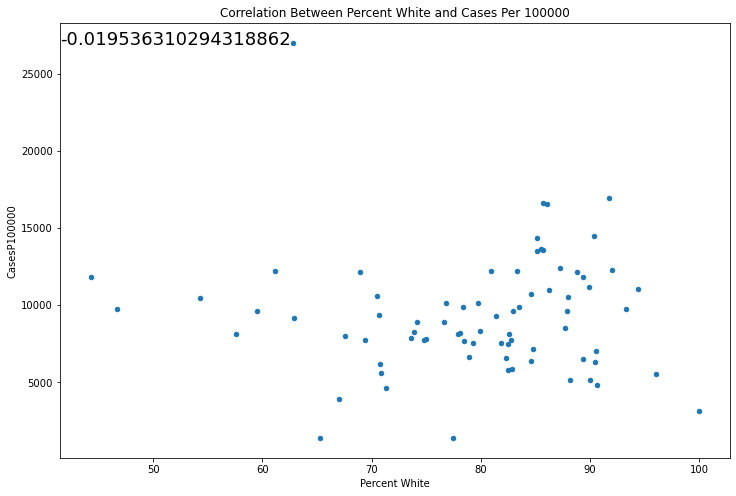

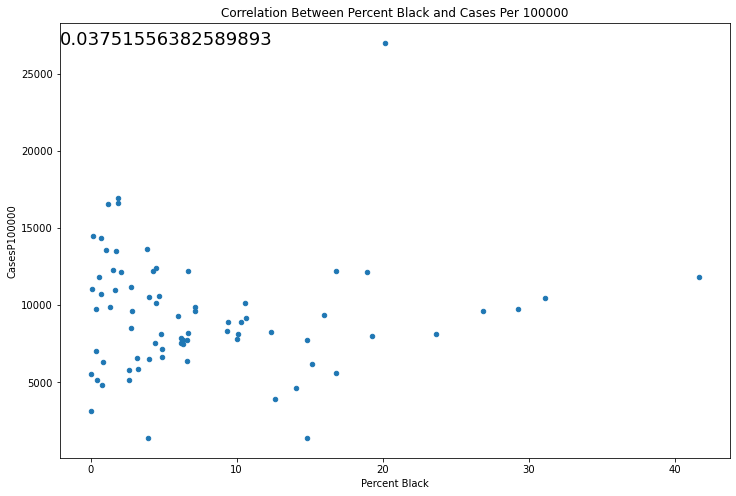

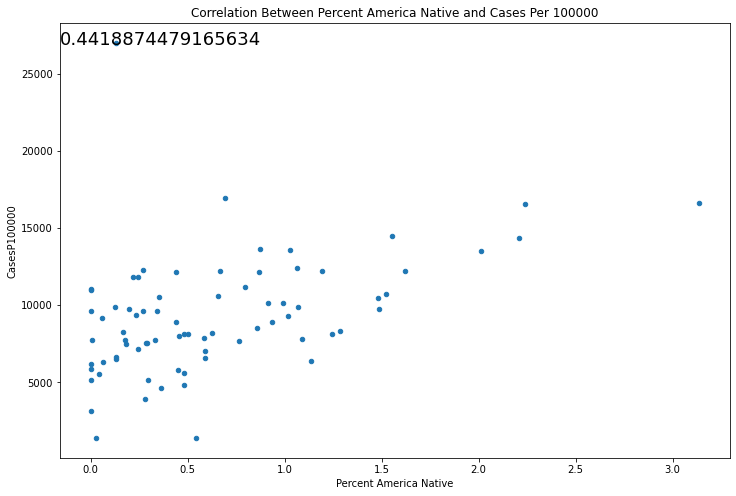

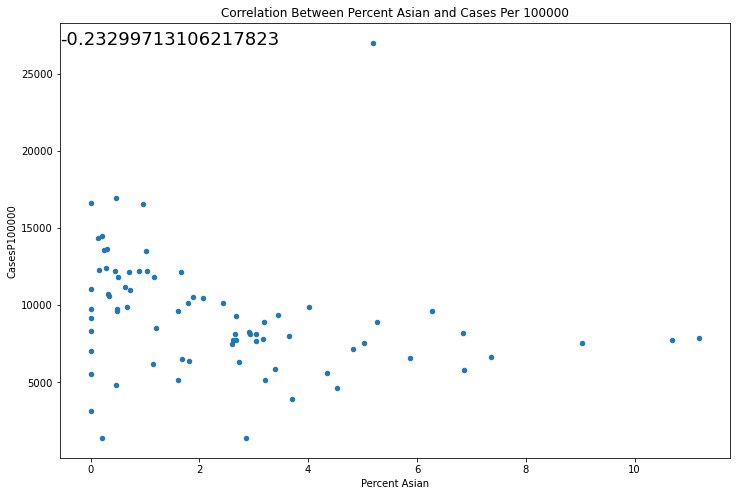

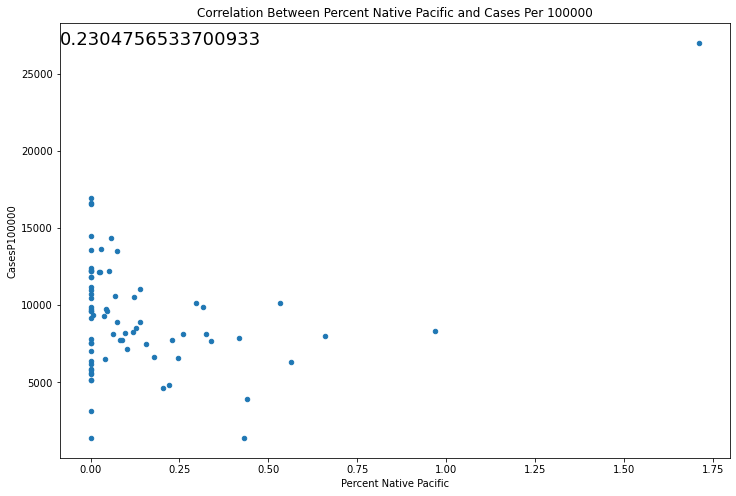

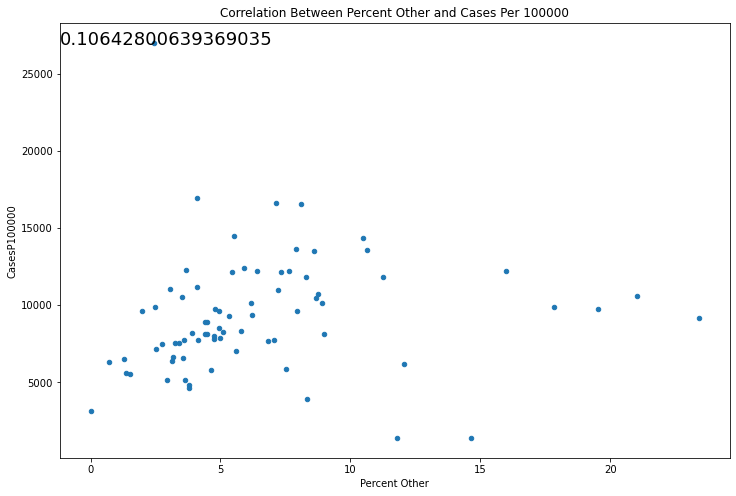

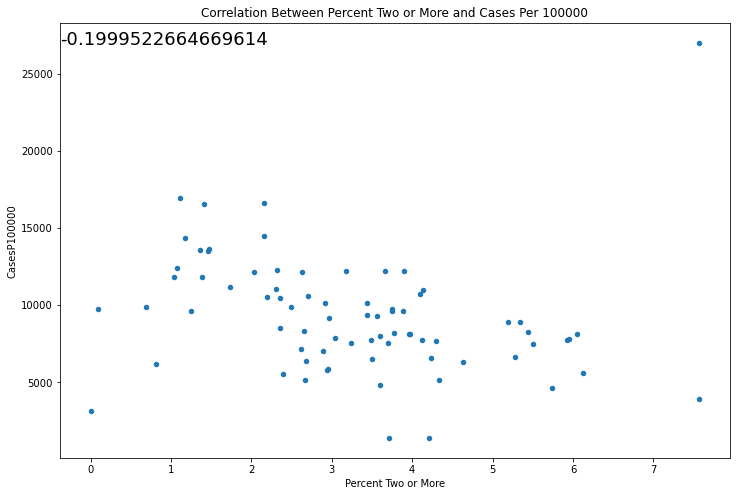

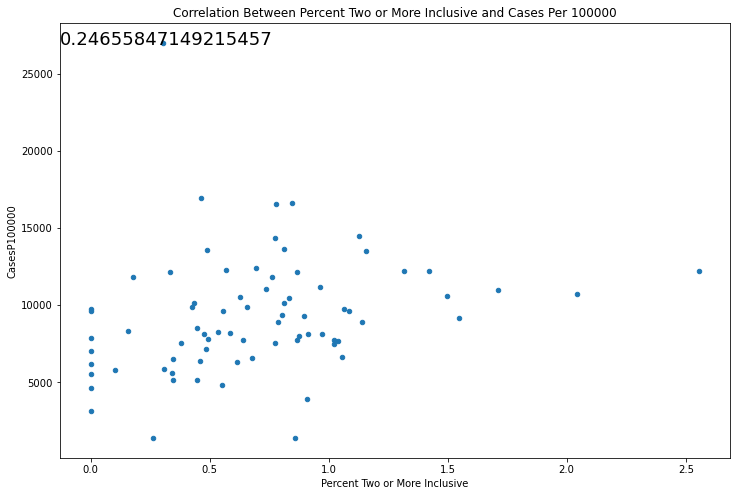

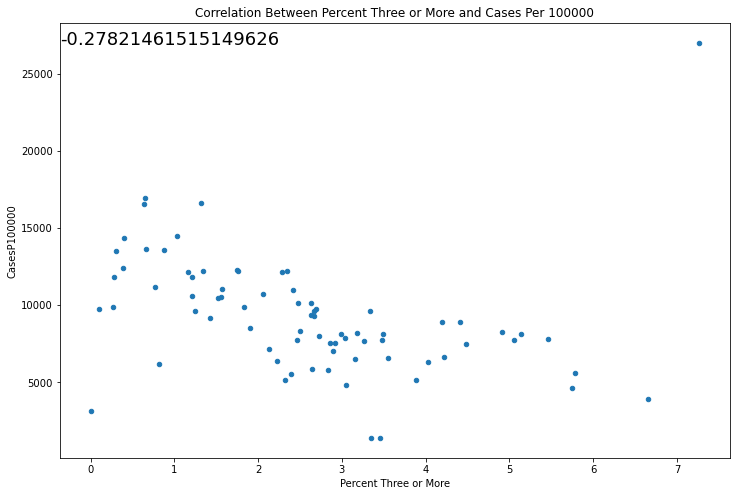

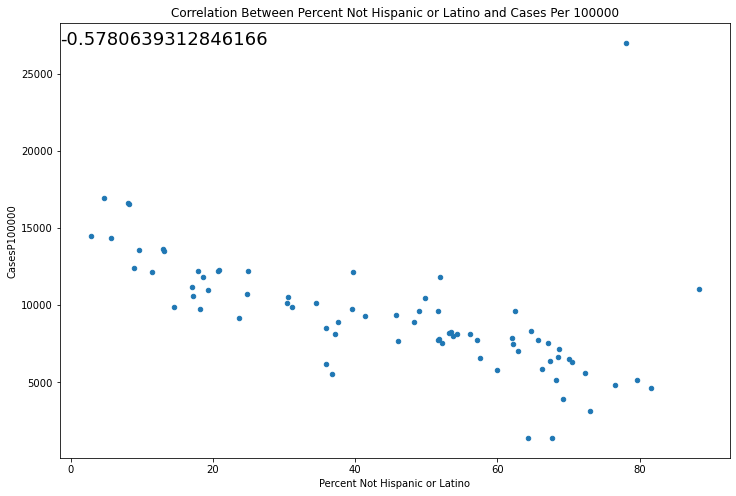

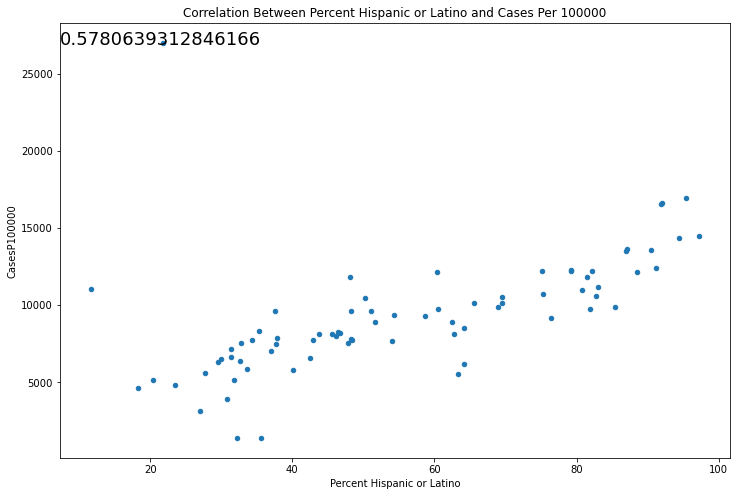

In [15]:
for element in percentlist:
    merged_data.plot.scatter(element,"CasesP100000", figsize = (12,8),
                             title=f'Correlation Between {element} and Cases Per 100000')
    
    correlation = st.pearsonr(merged_data[element],
                                 merged_data["CasesP100000"])
    plt.annotate(correlation[0],xy=(0,0.95),fontsize = 18,xycoords='axes fraction')

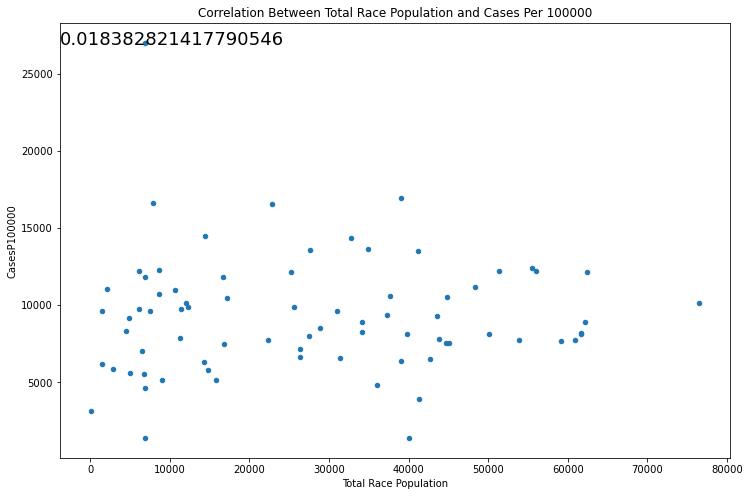

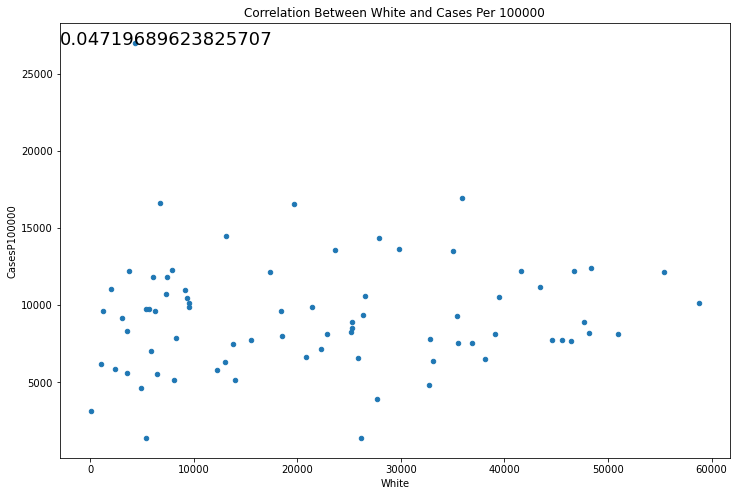

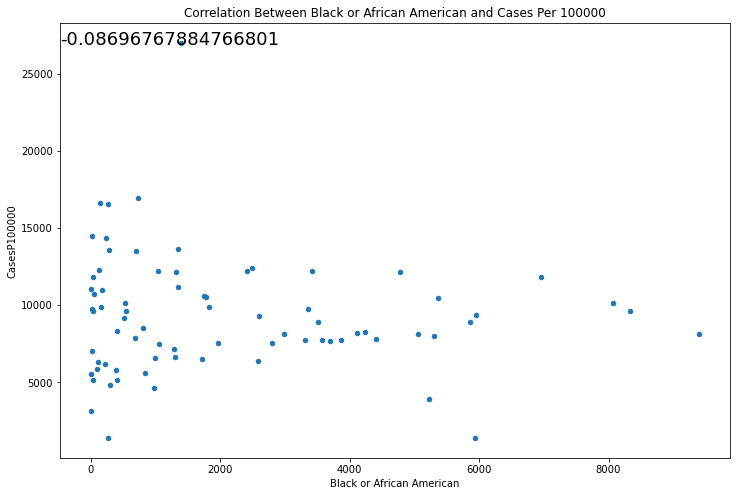

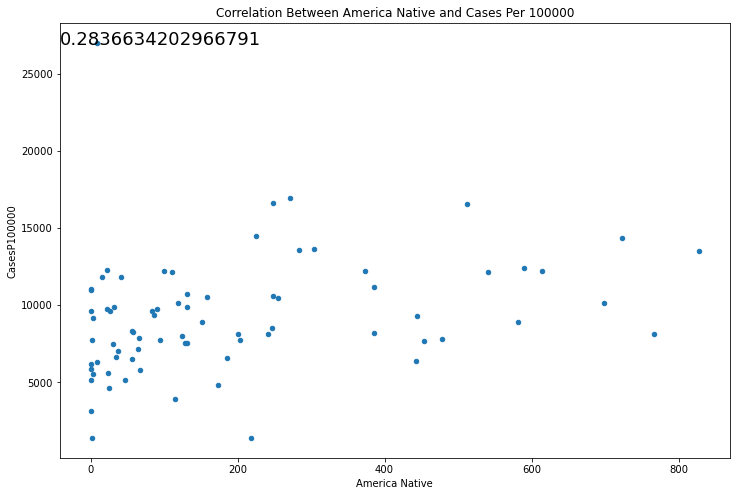

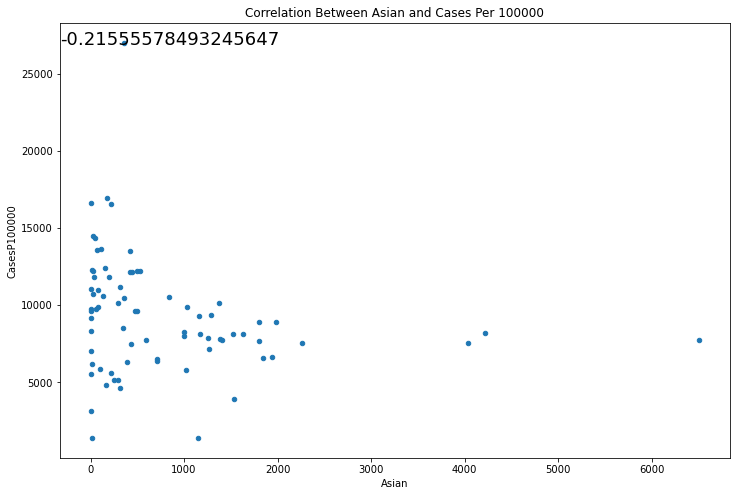

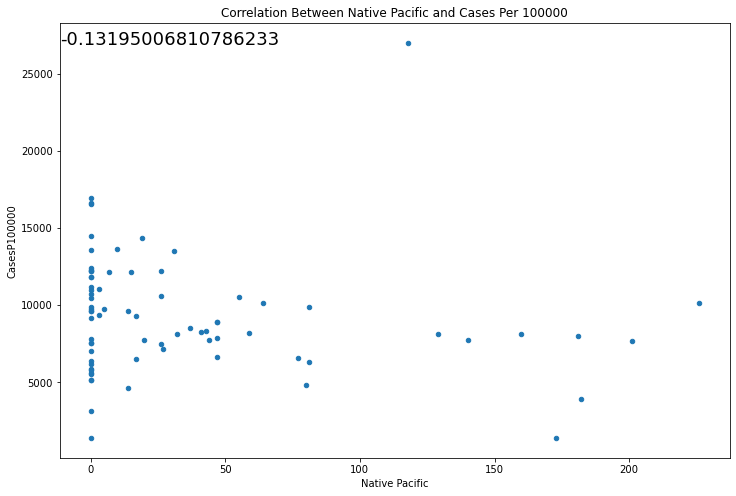

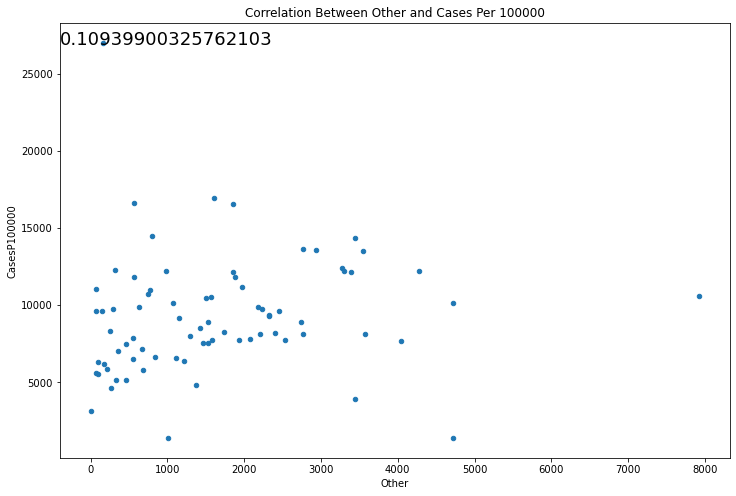

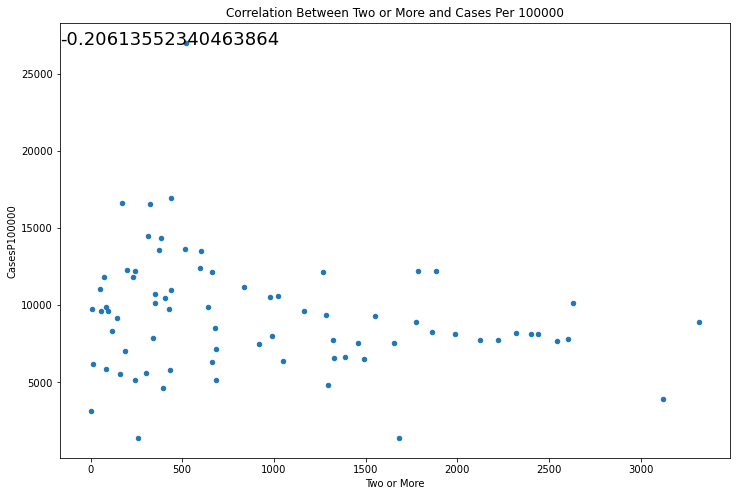

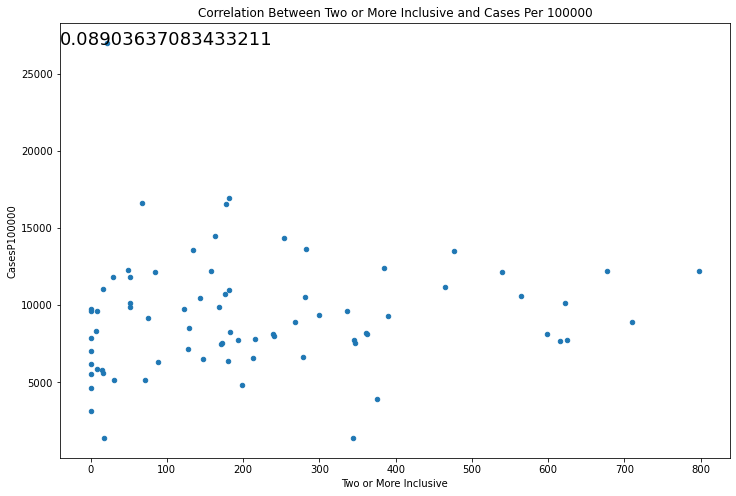

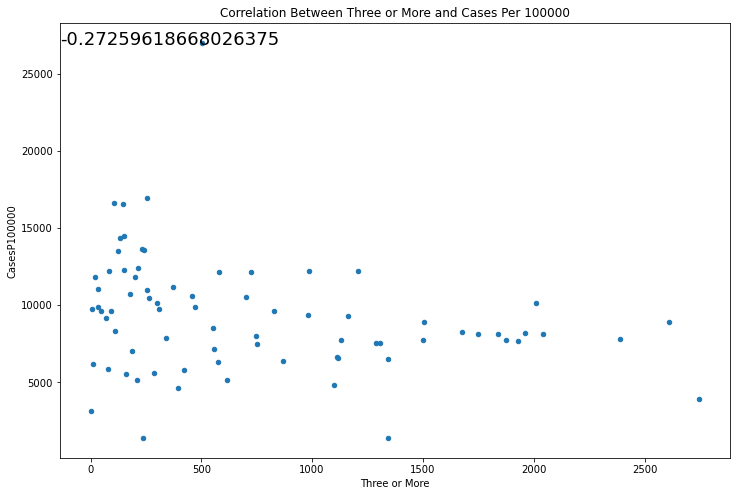

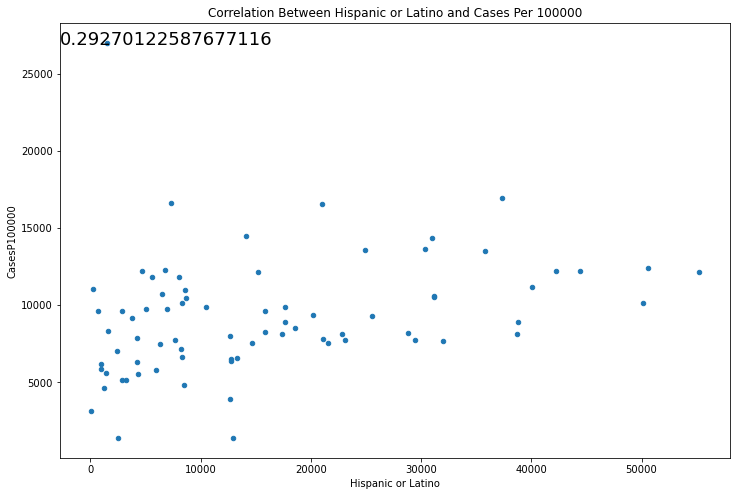

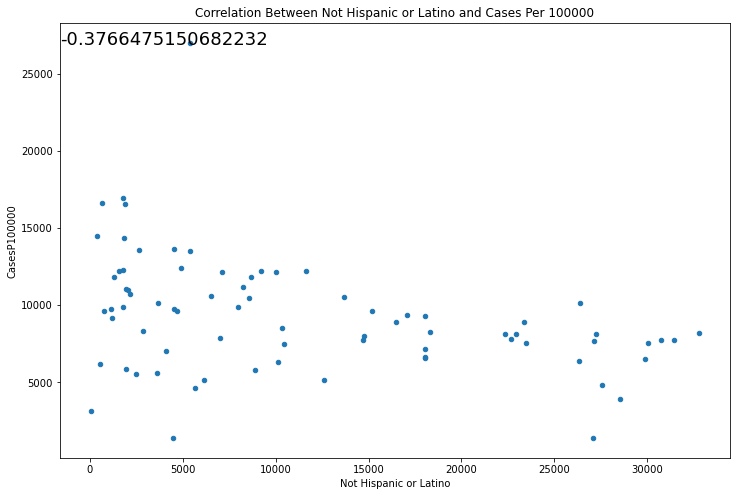

In [16]:
for element in testlist:
    merged_data.plot.scatter(element,"CasesP100000", figsize = (12,8),title=f'Correlation Between {element} and Cases Per 100000')
    correlation = st.pearsonr(merged_data[element],
                                 merged_data["CasesP100000"])
    plt.annotate(correlation[0],xy=(0,0.95),fontsize = 18,xycoords='axes fraction')
    

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


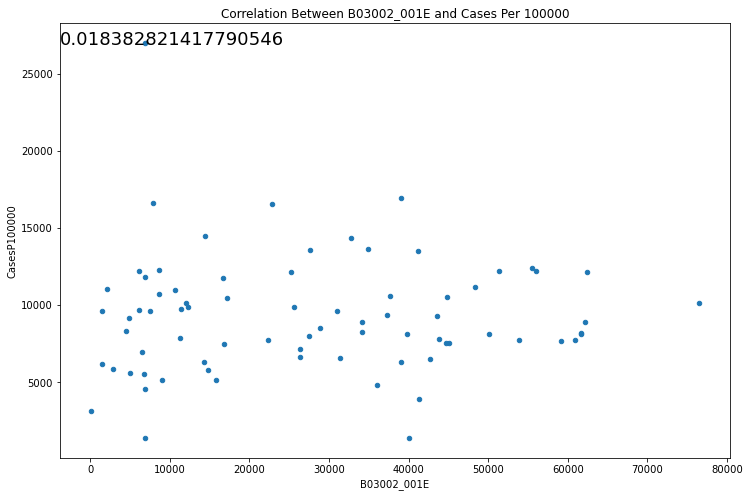

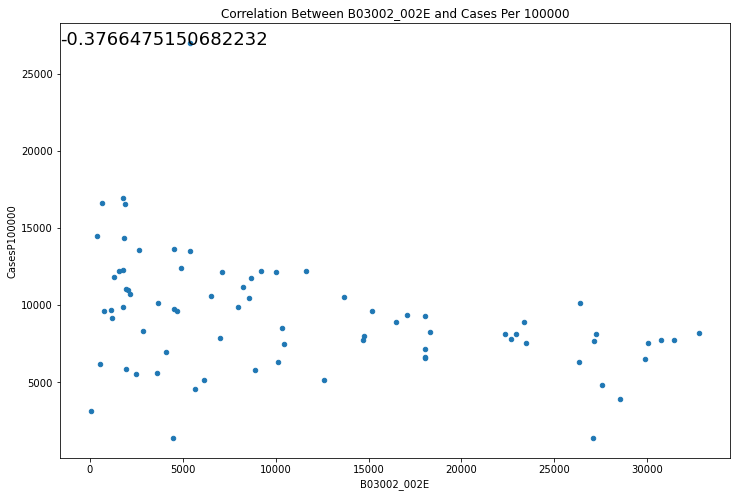

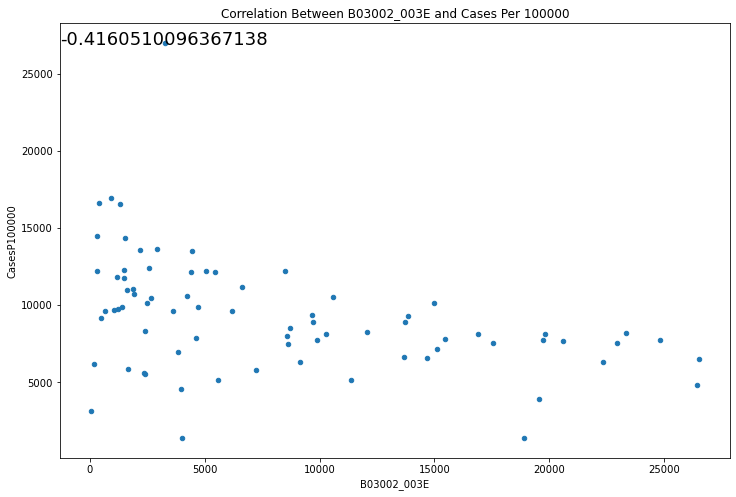

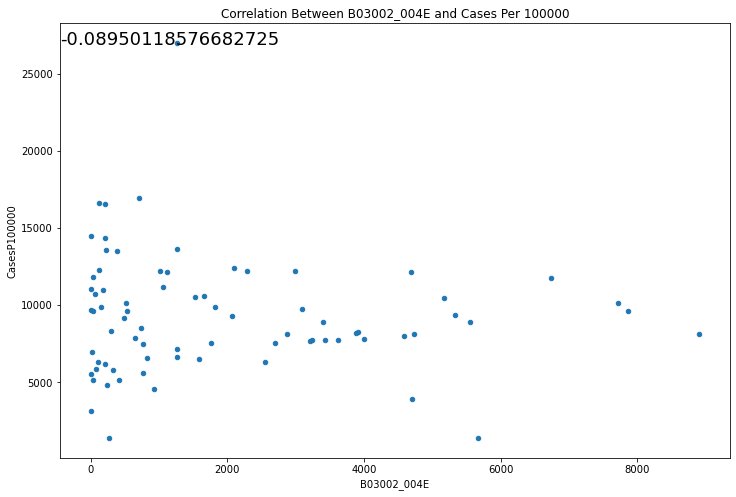

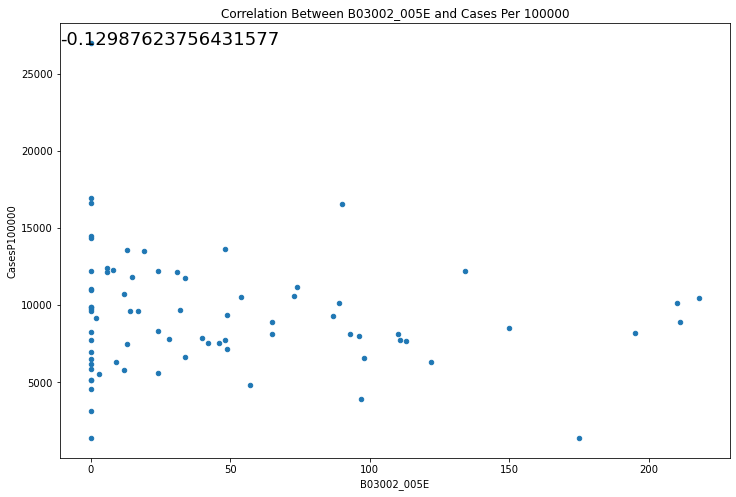

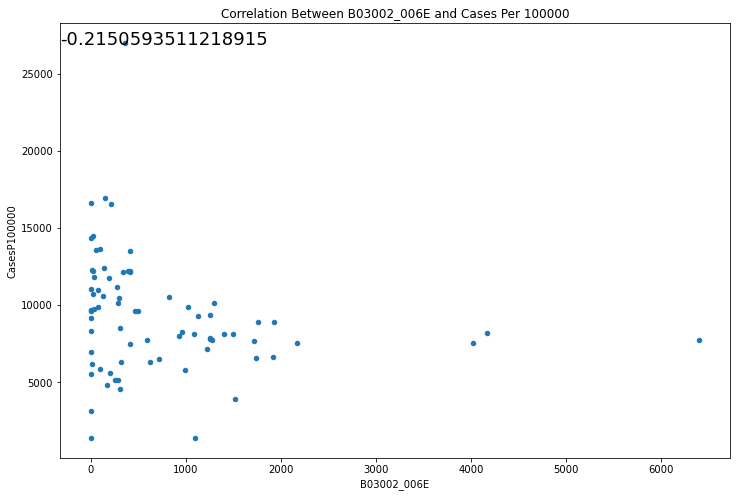

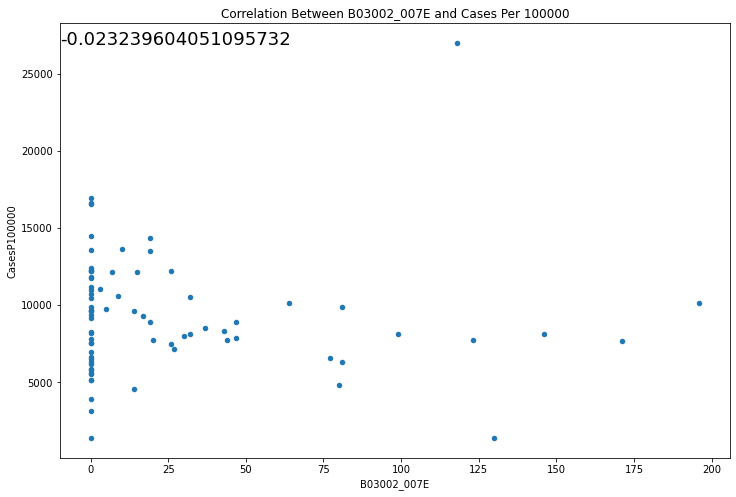

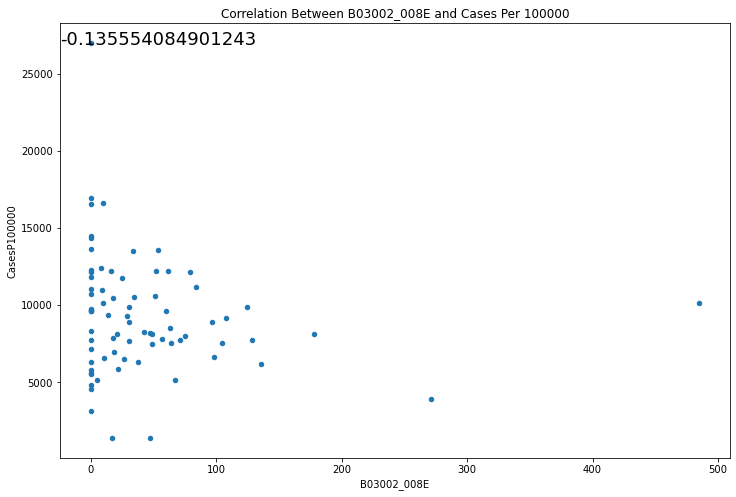

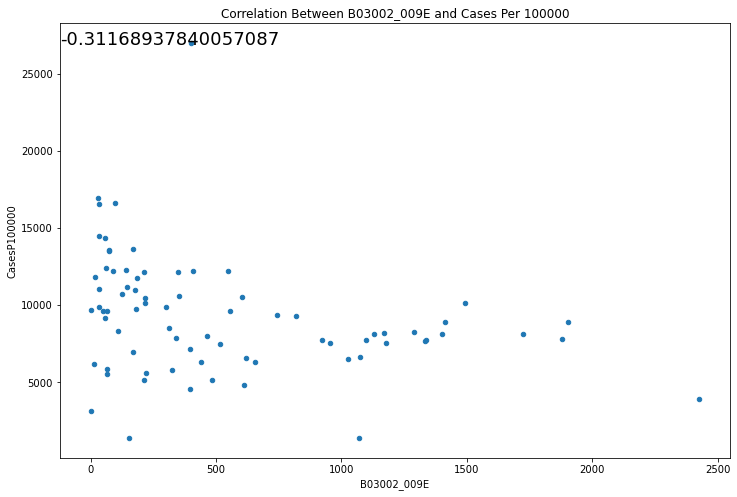

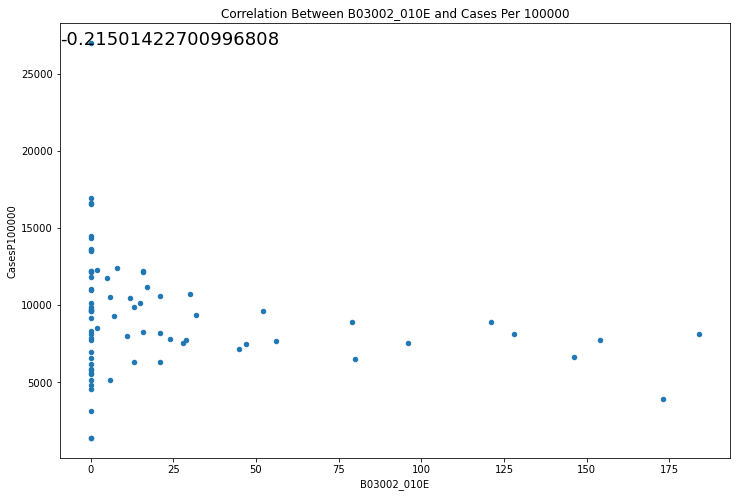

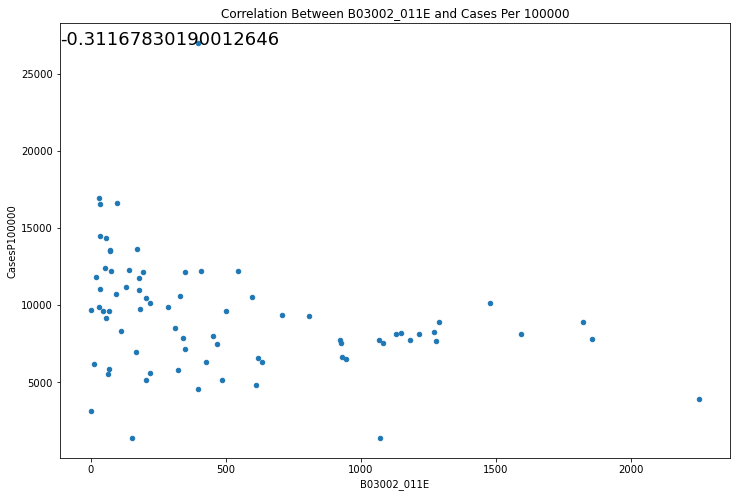

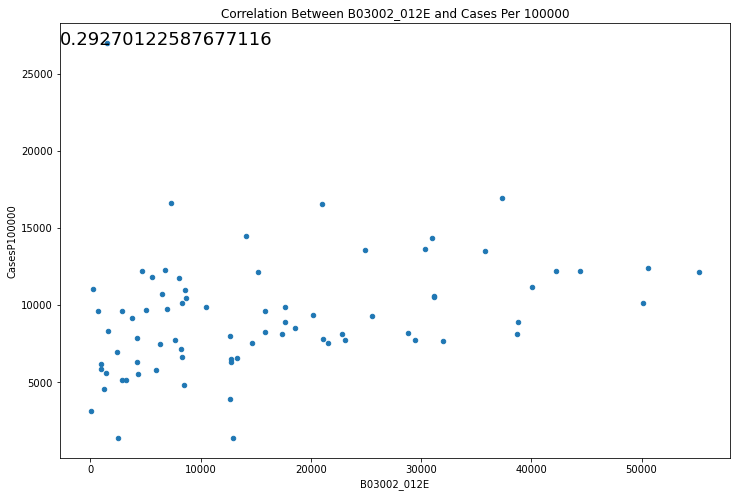

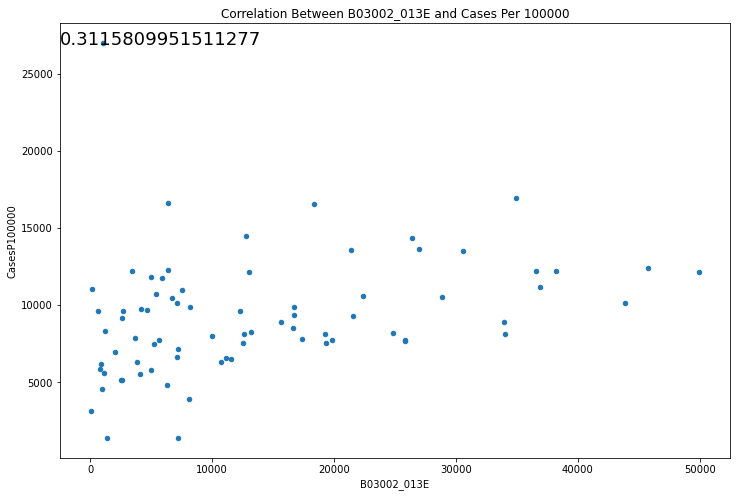

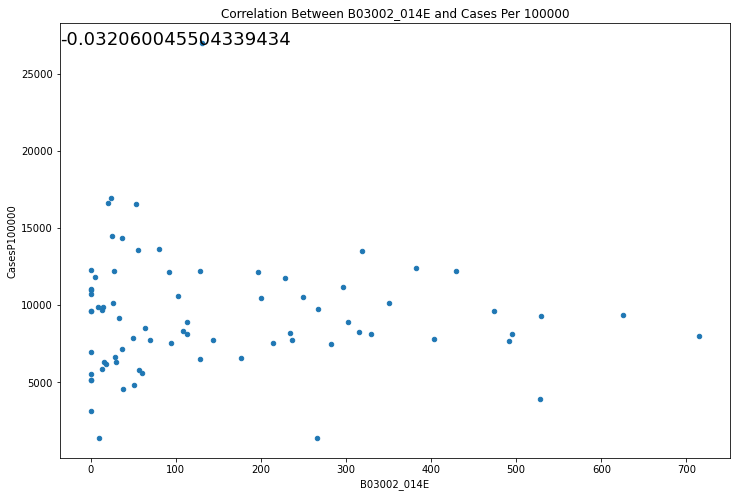

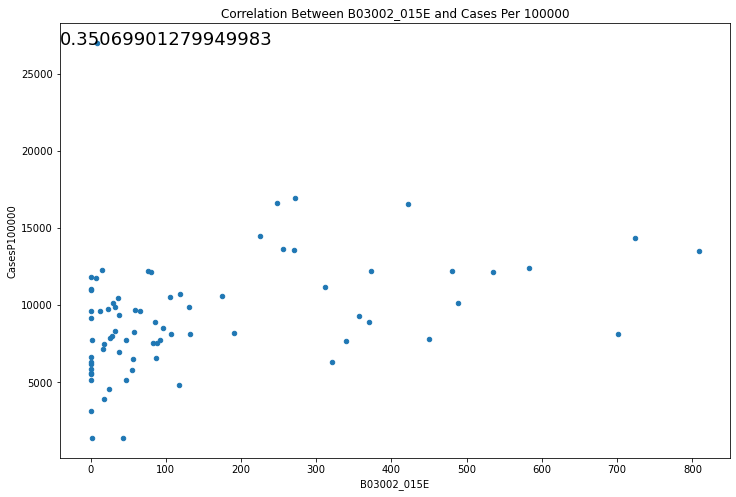

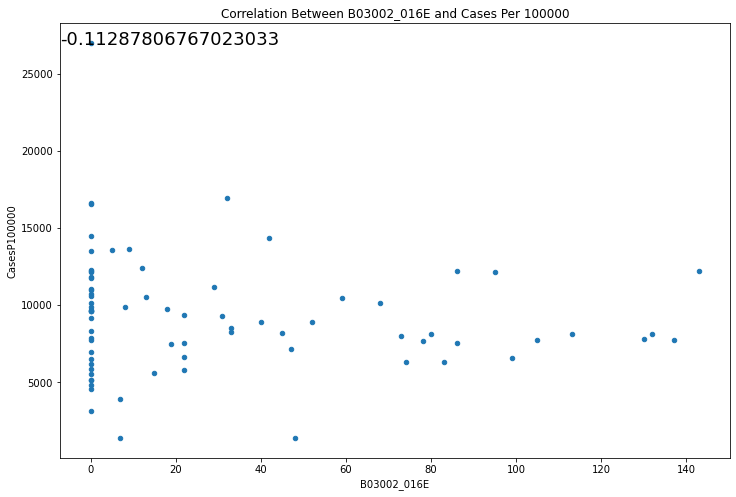

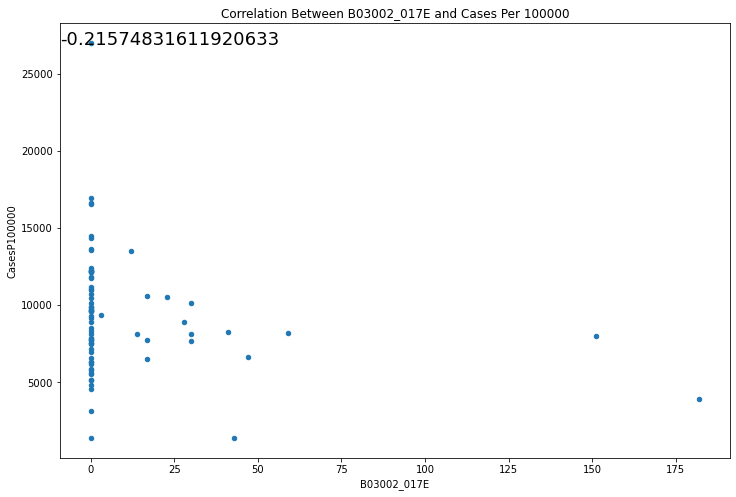

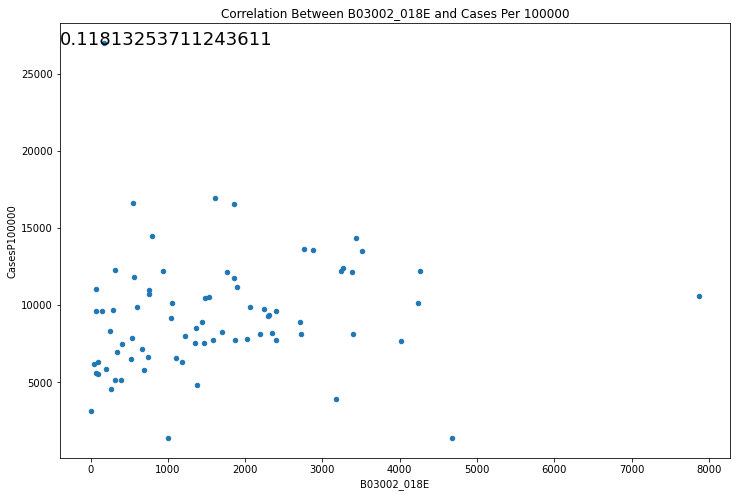

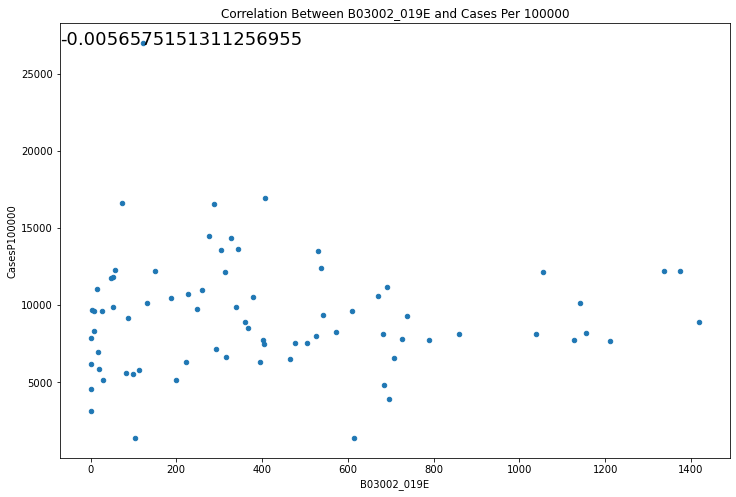

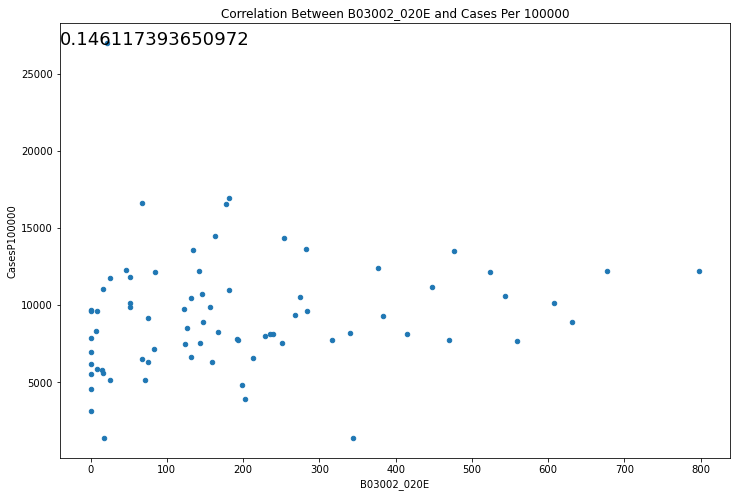

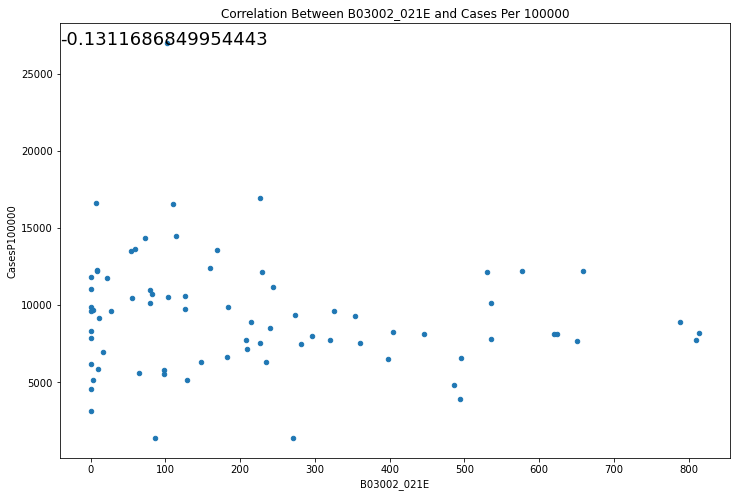

In [17]:
hispanic_list =['B03002_001E', 'B03002_002E', 'B03002_003E', 'B03002_004E',
       'B03002_005E', 'B03002_006E', 'B03002_007E', 'B03002_008E',
       'B03002_009E', 'B03002_010E', 'B03002_011E', 'B03002_012E',
       'B03002_013E', 'B03002_014E', 'B03002_015E', 'B03002_016E',
       'B03002_017E', 'B03002_018E', 'B03002_019E', 'B03002_020E',
       'B03002_021E']
for element in hispanic_list:
    hispanic_merge.plot.scatter(element,"CasesP100000", figsize = (12,8),title=f'Correlation Between {element} and Cases Per 100000')
    correlation = st.pearsonr(hispanic_merge[element],
                                 hispanic_merge["CasesP100000"])
    plt.annotate(correlation[0],xy=(0,0.95),fontsize = 18,xycoords='axes fraction')

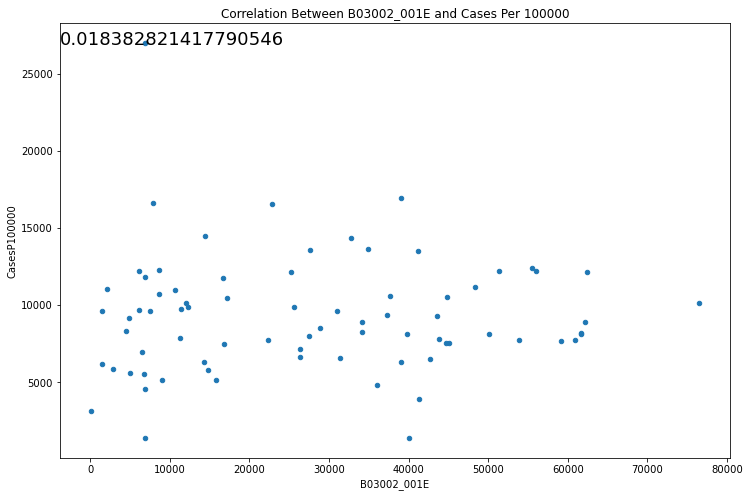

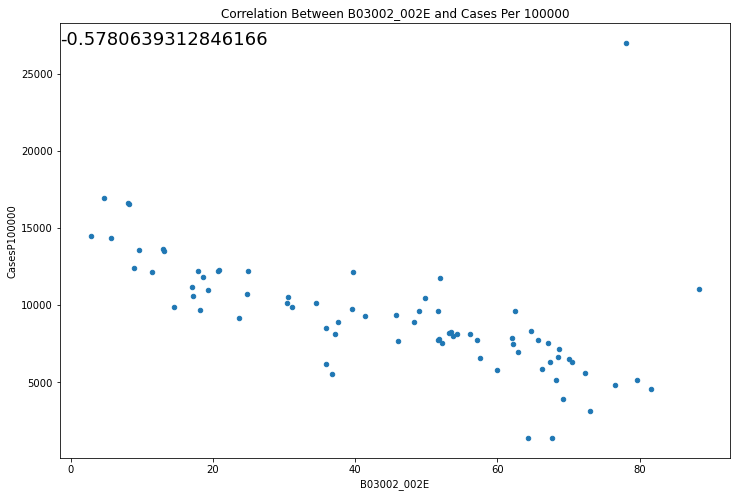

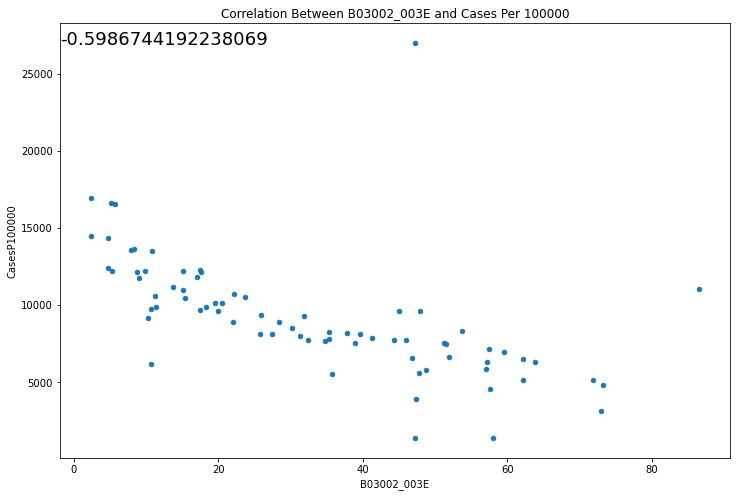

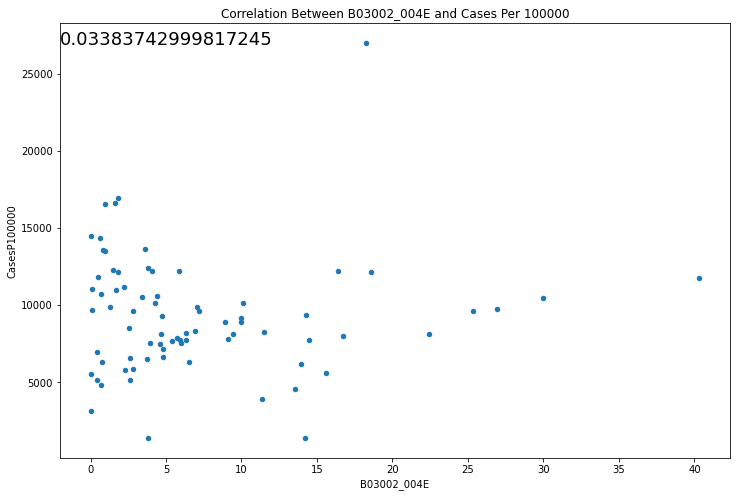

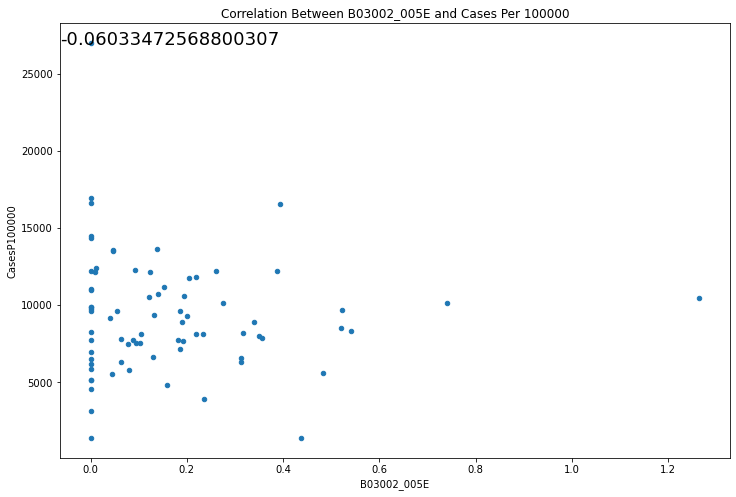

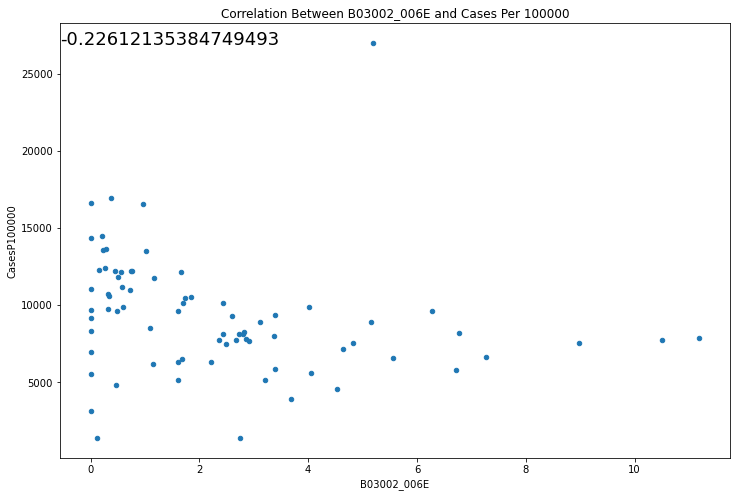

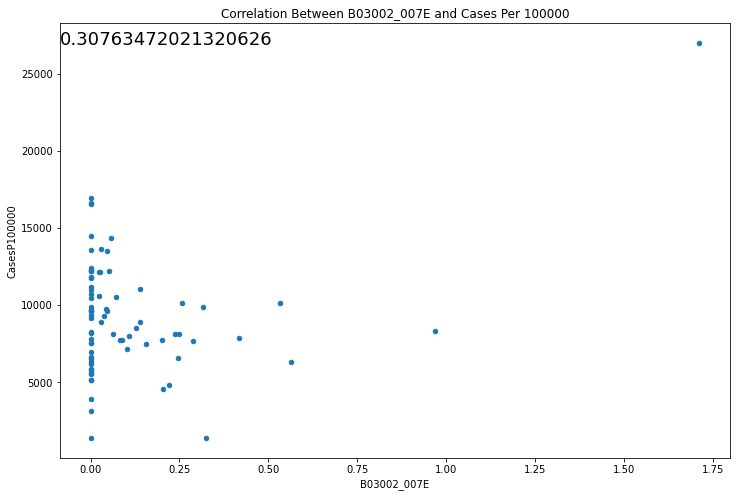

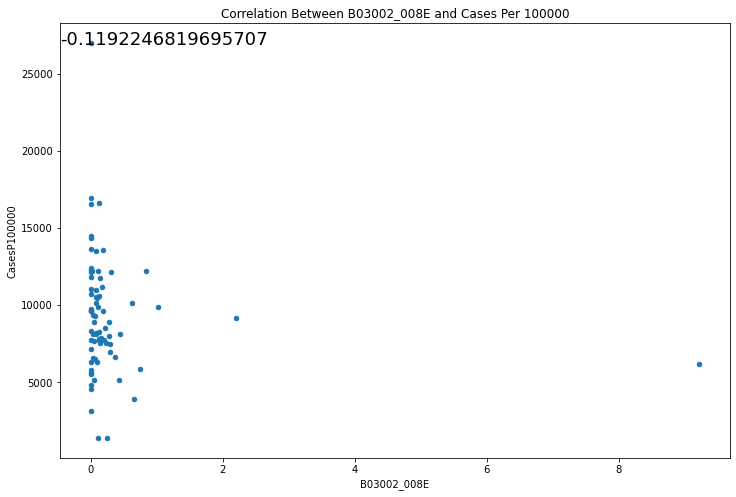

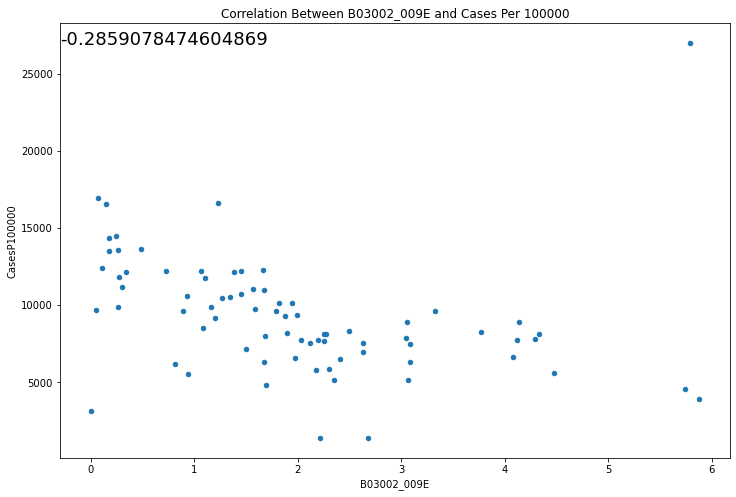

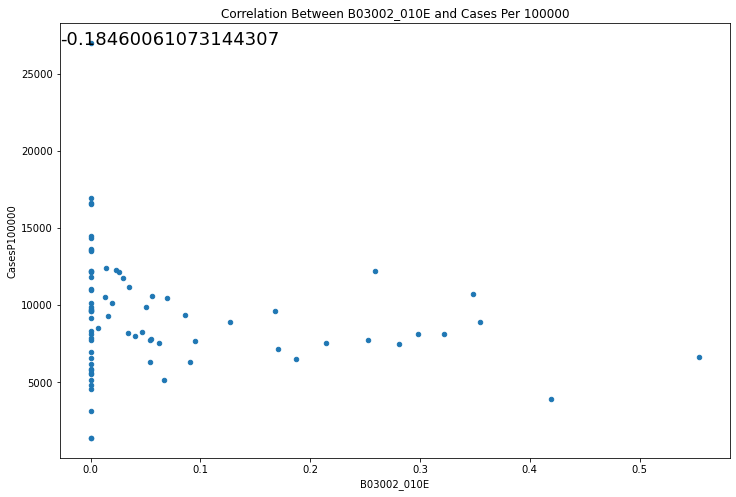

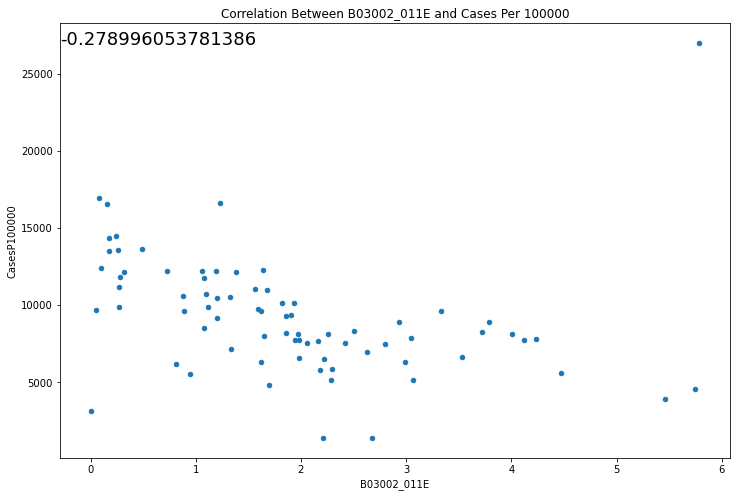

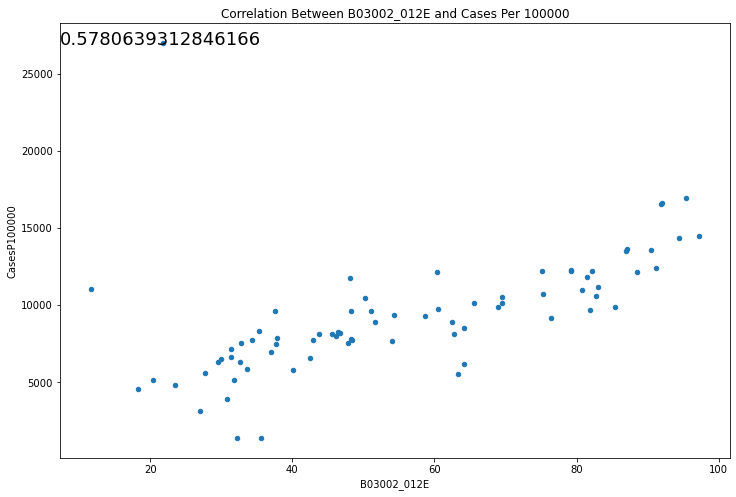

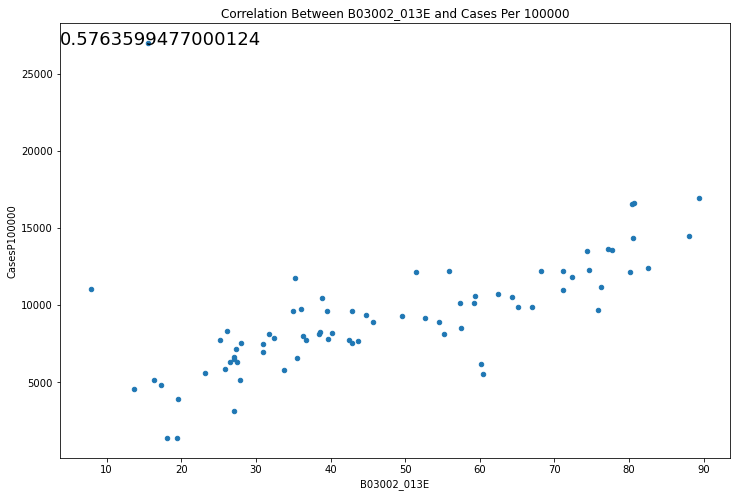

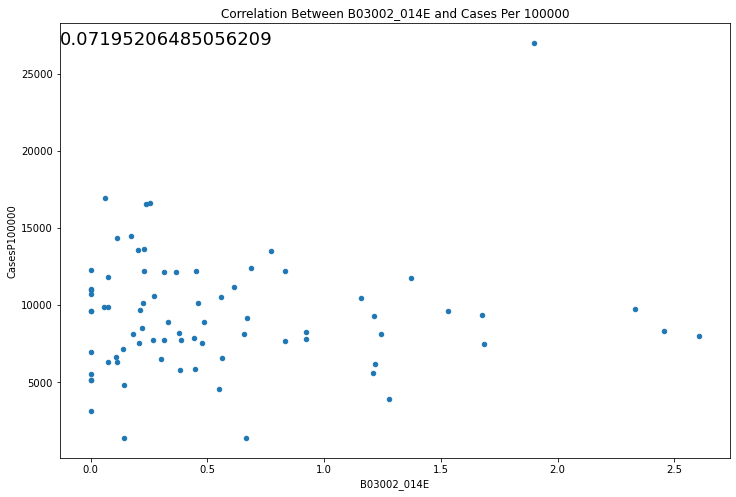

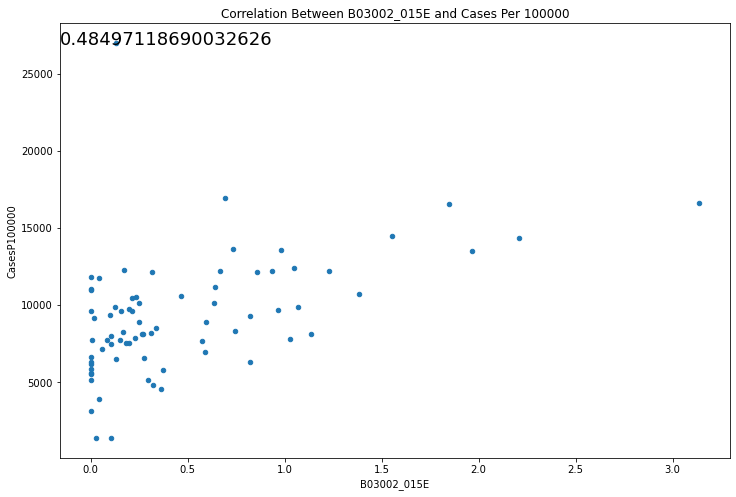

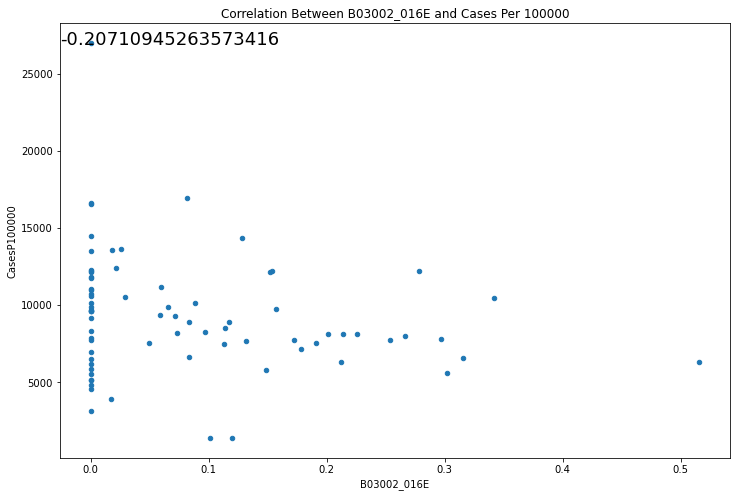

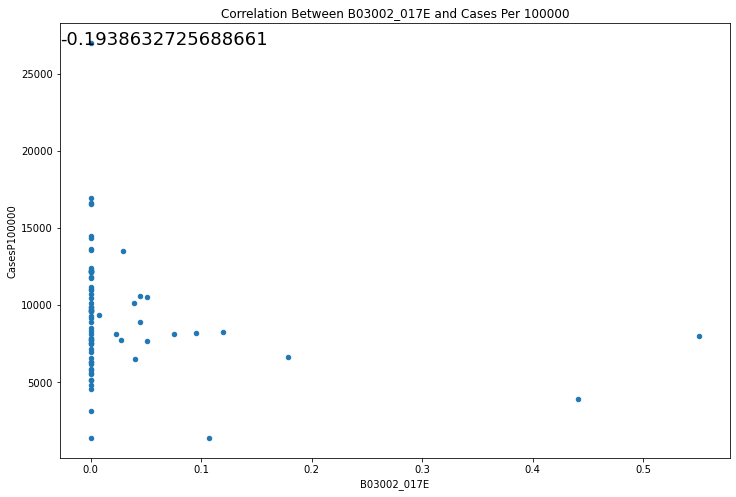

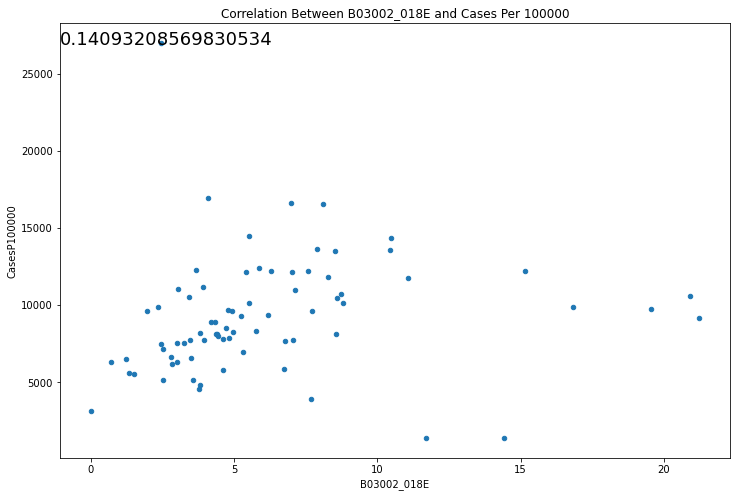

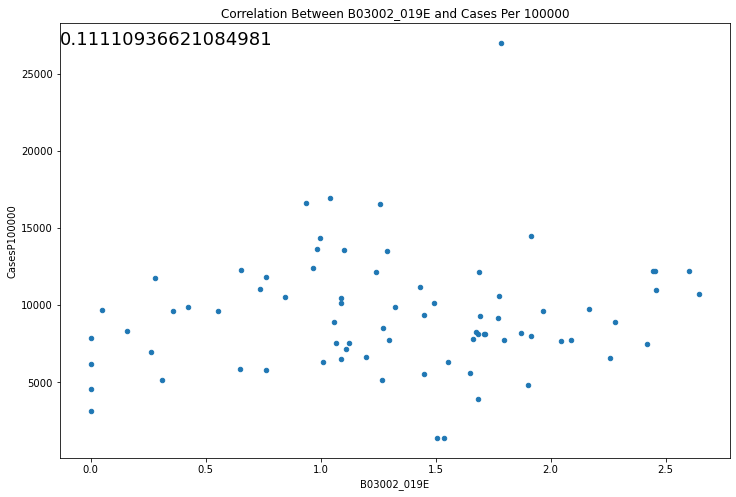

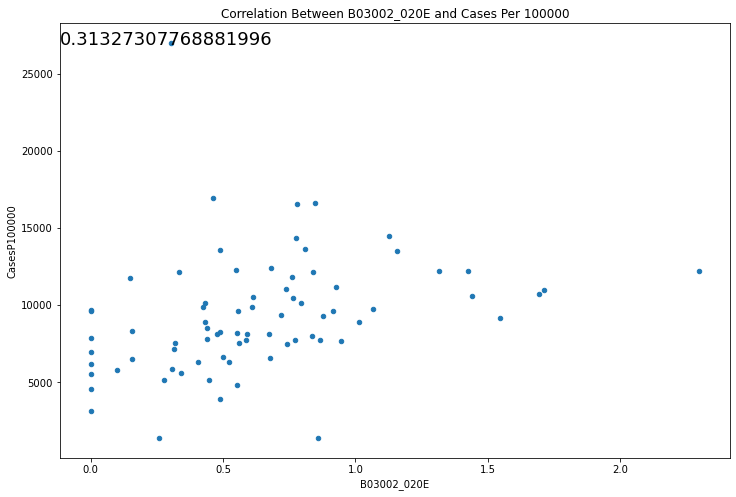

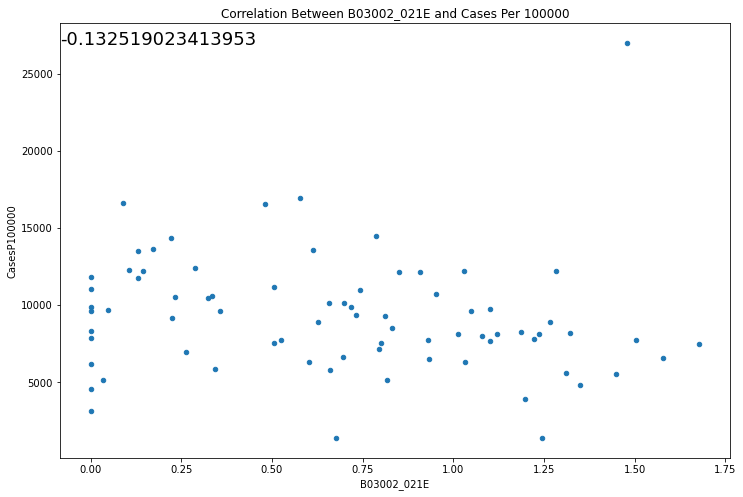

In [18]:
hispanic_list =['B03002_001E', 'B03002_002E', 'B03002_003E', 'B03002_004E',
       'B03002_005E', 'B03002_006E', 'B03002_007E', 'B03002_008E',
       'B03002_009E', 'B03002_010E', 'B03002_011E', 'B03002_012E',
       'B03002_013E', 'B03002_014E', 'B03002_015E', 'B03002_016E',
       'B03002_017E', 'B03002_018E', 'B03002_019E', 'B03002_020E',
       'B03002_021E']
for element in hispanic_list:
    hispanicpercents.plot.scatter(element,"CasesP100000", figsize = (12,8),title=f'Correlation Between {element} and Cases Per 100000')
    correlation = st.pearsonr(hispanicpercents[element],
                                 hispanicpercents["CasesP100000"])
    plt.annotate(correlation[0],xy=(0,0.95),fontsize = 18,xycoords='axes fraction')

In [19]:
#Group zip codes >51% hispanic and >51% non hispanic >
    #check stats, box plots
majorityhispanic = pd.DataFrame
majoritynonhispanic = pd.DataFrame

majorityhispanic = merged_data.copy()[merged_data["Percent Hispanic or Latino"] >51]
majoritynonhispanic = merged_data.copy()[merged_data["Percent Not Hispanic or Latino"]> 51]

majorityhispanic_stats = majorityhispanic[['populationtotals_totpop_cy', 'Positive', 'CasesP100000',
       'ZipInt', 'ActiveCases', 'ActiveCaseRate']]
majoritynonhispanic_stats = majoritynonhispanic[['populationtotals_totpop_cy', 'Positive', 'CasesP100000',
       'ZipInt', 'ActiveCases', 'ActiveCaseRate']]
majorityhispanic["ZipInt"].to_csv("majorityhispanic_filter")
majoritynonhispanic["ZipInt"].to_csv("majoritynonhispanic_filter")

In [20]:
nonhispaniclist = majoritynonhispanic["ZipInt"].tolist()
display(nonhispaniclist)

[78006,
 78015,
 78023,
 78101,
 78108,
 78109,
 78124,
 78148,
 78150,
 78152,
 78154,
 78205,
 78209,
 78215,
 78217,
 78220,
 78230,
 78231,
 78232,
 78233,
 78234,
 78236,
 78239,
 78240,
 78247,
 78248,
 78249,
 78253,
 78255,
 78256,
 78257,
 78258,
 78259,
 78260,
 78261,
 78263,
 78266]

In [21]:
bexar_countydata.columns

Index(['ZIP_CODE', 'populationtotals_totpop_cy', 'Positive', 'CasesP100000',
       'ZipInt', 'ActiveCases', 'ActiveCaseRate'],
      dtype='object')

In [22]:
display(majorityhispanic)

,Total Race Population,B03002_003E,Not Hispanic or Latino,Hispanic or Latino,White,Black or African American,America Native,Asian,Native Pacific,Other,...,Percent Black,Percent America Native,Percent Asian,Percent Native Pacific,Percent Other,Percent Two or More,Percent Two or More Inclusive,Percent Three or More,Percent Not Hispanic or Latino,Percent Hispanic or Latino
0,6833.0,1161.0,1266.0,5567.0,6105.0,41.0,15.0,35.0,0.0,566.0,...,0.600029,0.219523,0.512220,0.000000,8.283331,1.039075,0.761013,0.278062,18.527733,81.472267
4,6769.0,2416.0,2483.0,4286.0,6502.0,0.0,3.0,0.0,0.0,102.0,...,0.000000,0.044320,0.000000,0.000000,1.506870,2.393263,0.000000,2.393263,36.681932,63.318068
5,6115.0,1066.0,1109.0,5006.0,5704.0,21.0,91.0,0.0,0.0,293.0,...,0.343418,1.488144,0.000000,0.000000,4.791496,0.098119,0.000000,0.098119,18.135732,81.864268
6,8580.0,1494.0,1789.0,6791.0,7898.0,130.0,23.0,14.0,0.0,316.0,...,1.515152,0.268065,0.163170,0.000000,3.682984,2.319347,0.571096,1.748252,20.850816,79.149184
10,8617.0,1910.0,2135.0,6482.0,7291.0,60.0,131.0,28.0,0.0,754.0,...,0.696298,1.520251,0.324939,0.000000,8.750145,4.096553,2.042474,2.054079,24.776604,75.223396
16,48334.0,6602.0,8247.0,40087.0,43467.0,1356.0,385.0,310.0,0.0,1977.0,...,2.805479,0.796541,0.641370,0.000000,4.090288,1.735838,0.962056,0.773782,17.062523,82.937477
17,11453.0,1217.0,4528.0,6925.0,5347.0,3354.0,23.0,55.0,5.0,2239.0,...,29.284904,0.200821,0.480224,0.043657,19.549463,3.754475,1.065223,2.689252,39.535493,60.464507
18,6180.0,328.0,1535.0,4645.0,3782.0,1041.0,100.0,28.0,0.0,988.0,...,16.844660,1.618123,0.453074,0.000000,15.987055,3.899676,2.556634,1.343042,24.838188,75.161812
19,12231.0,1390.0,1780.0,10451.0,9582.0,167.0,131.0,82.0,0.0,2184.0,...,1.365383,1.071049,0.670428,0.000000,17.856267,0.694955,0.425149,0.269806,14.553185,85.446815
21,55484.0,2595.0,4917.0,50567.0,48388.0,2486.0,589.0,155.0,0.0,3268.0,...,4.480571,1.061567,0.279360,0.000000,5.889986,1.077788,0.693894,0.383894,8.862014,91.137986


In [23]:
display(majoritynonhispanic)

,Total Race Population,B03002_003E,Not Hispanic or Latino,Hispanic or Latino,White,Black or African American,America Native,Asian,Native Pacific,Other,...,Percent Black,Percent America Native,Percent Asian,Percent Native Pacific,Percent Other,Percent Two or More,Percent Two or More Inclusive,Percent Three or More,Percent Not Hispanic or Latino,Percent Hispanic or Latino
1,36056.0,26416.0,27579.0,8477.0,32669.0,296.0,174.0,169.0,80.0,1371.0,...,0.820945,0.482583,0.468715,0.221877,3.802418,3.597182,0.551919,3.045263,76.489350,23.510650
2,15811.0,11368.0,12588.0,3223.0,13945.0,415.0,47.0,253.0,0.0,466.0,...,2.624755,0.297261,1.600152,0.000000,2.947315,4.332427,0.449054,3.883372,79.615458,20.384542
3,31357.0,14668.0,18040.0,13317.0,25813.0,1002.0,185.0,1840.0,77.0,1112.0,...,3.195459,0.589980,5.867908,0.245559,3.546258,4.235099,0.679274,3.555825,57.531014,42.468986
7,6465.0,3854.0,4069.0,2396.0,5852.0,26.0,38.0,0.0,0.0,362.0,...,0.402166,0.587780,0.000000,0.000000,5.599381,2.892498,0.000000,2.892498,62.938902,37.061098
8,39999.0,18893.0,27085.0,12914.0,26114.0,5938.0,218.0,1146.0,173.0,4725.0,...,14.845371,0.545014,2.865072,0.432511,11.812795,4.212605,0.860022,3.352584,67.714193,32.285807
9,39769.0,10266.0,22350.0,17419.0,22891.0,9400.0,200.0,1166.0,129.0,3579.0,...,23.636501,0.502904,2.931932,0.324373,8.999472,6.044909,0.912771,5.132138,56.199552,43.800448
11,6913.0,4007.0,4449.0,2464.0,5352.0,274.0,2.0,15.0,0.0,1013.0,...,3.963547,0.028931,0.216982,0.000000,14.653551,3.717633,0.260379,3.457254,64.357009,35.642991
12,22364.0,9905.0,14686.0,7678.0,15526.0,3313.0,2.0,596.0,20.0,1583.0,...,14.813987,0.008943,2.664997,0.089429,7.078340,5.920229,0.867466,5.052763,65.668038,34.331962
13,37.0,27.0,27.0,10.0,37.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.972973,27.027027
14,2171.0,1880.0,1919.0,252.0,2050.0,2.0,0.0,0.0,3.0,66.0,...,0.092123,0.000000,0.000000,0.138185,3.040074,2.303086,0.736988,1.566099,88.392446,11.607554


In [24]:
majorityhispanic.corr()

,Total Race Population,B03002_003E,Not Hispanic or Latino,Hispanic or Latino,White,Black or African American,America Native,Asian,Native Pacific,Other,...,Percent Black,Percent America Native,Percent Asian,Percent Native Pacific,Percent Other,Percent Two or More,Percent Two or More Inclusive,Percent Three or More,Percent Not Hispanic or Latino,Percent Hispanic or Latino
Total Race Population,1.000000,0.758032,0.760890,0.945271,0.989375,0.588082,0.771025,0.670352,0.573233,0.693453,...,-0.019758,0.040322,0.384297,0.297121,-0.347573,0.270725,0.062409,0.290089,0.119062,-0.119062
B03002_003E,0.758032,1.000000,0.968727,0.519456,0.710977,0.626133,0.460883,0.901416,0.764605,0.417361,...,0.111983,-0.123249,0.675221,0.502501,-0.359198,0.552185,0.028753,0.639528,0.599578,-0.599578
Not Hispanic or Latino,0.760890,0.968727,1.000000,0.507526,0.689150,0.793418,0.423365,0.924860,0.753414,0.435346,...,0.287108,-0.171200,0.716989,0.487962,-0.322504,0.618864,0.046224,0.709957,0.665930,-0.665930
Hispanic or Latino,0.945271,0.519456,0.507526,1.000000,0.967236,0.381937,0.810942,0.425087,0.382334,0.701911,...,-0.170608,0.139629,0.149766,0.149172,-0.299367,0.048297,0.059628,0.028205,-0.176760,0.176760
White,0.989375,0.710977,0.689150,0.967236,1.000000,0.478605,0.789552,0.611272,0.530389,0.645931,...,-0.126234,0.073285,0.325019,0.267499,-0.395026,0.185125,0.031943,0.203578,0.023915,-0.023915
Black or African American,0.588082,0.626133,0.793418,0.381937,0.478605,1.000000,0.230053,0.661867,0.477002,0.412133,...,0.660184,-0.250691,0.538125,0.263226,-0.133201,0.558766,0.082700,0.621122,0.630908,-0.630908
America Native,0.771025,0.460883,0.423365,0.810942,0.789552,0.230053,1.000000,0.379973,0.428628,0.590814,...,-0.256970,0.535258,0.081620,0.181906,-0.217681,0.024924,0.096193,-0.017211,-0.236098,0.236098
Asian,0.670352,0.901416,0.924860,0.425087,0.611272,0.661867,0.379973,1.000000,0.696195,0.281343,...,0.196519,-0.137514,0.875188,0.517048,-0.380441,0.631052,0.016576,0.738777,0.626003,-0.626003
Native Pacific,0.573233,0.764605,0.753414,0.382334,0.530389,0.477002,0.428628,0.696195,1.000000,0.355377,...,0.054410,-0.020873,0.510261,0.779438,-0.206261,0.378285,-0.016746,0.455817,0.410191,-0.410191
Other,0.693453,0.417361,0.435346,0.701911,0.645931,0.412133,0.590814,0.281343,0.355377,1.000000,...,0.052923,0.091685,0.058052,0.153314,0.266078,0.145217,0.238545,0.056030,-0.051148,0.051148


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


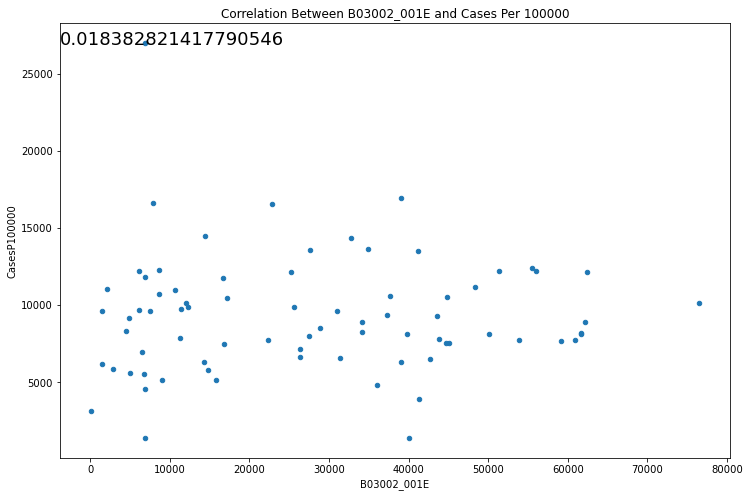

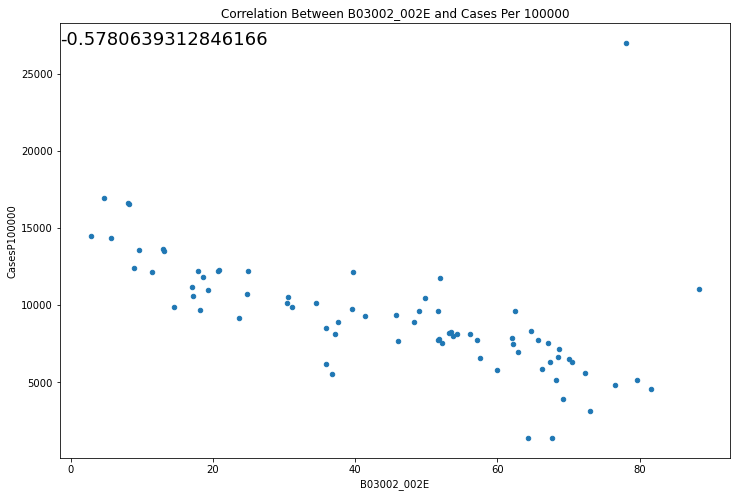

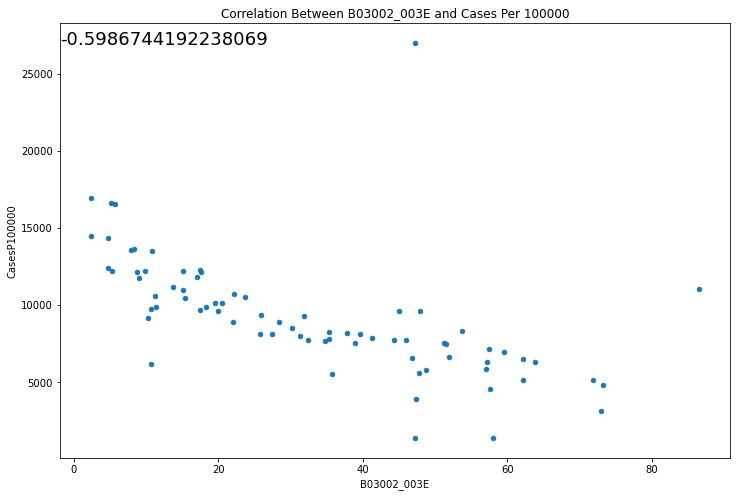

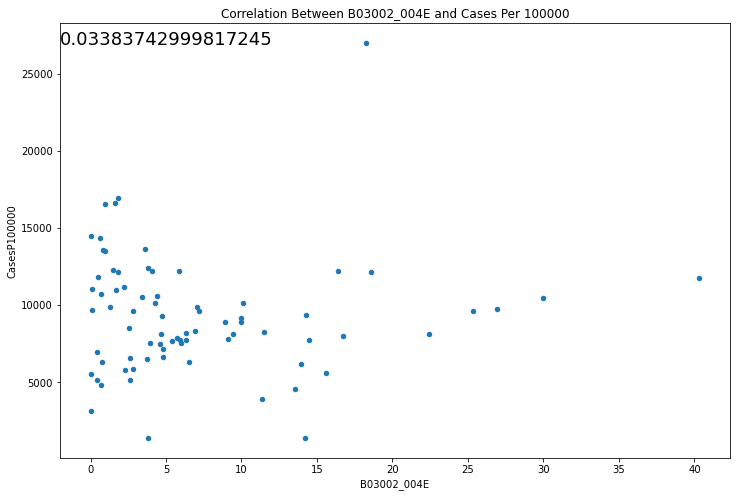

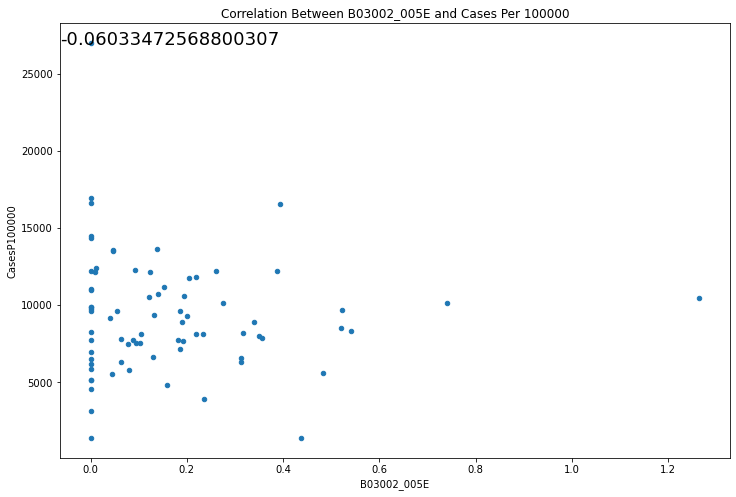

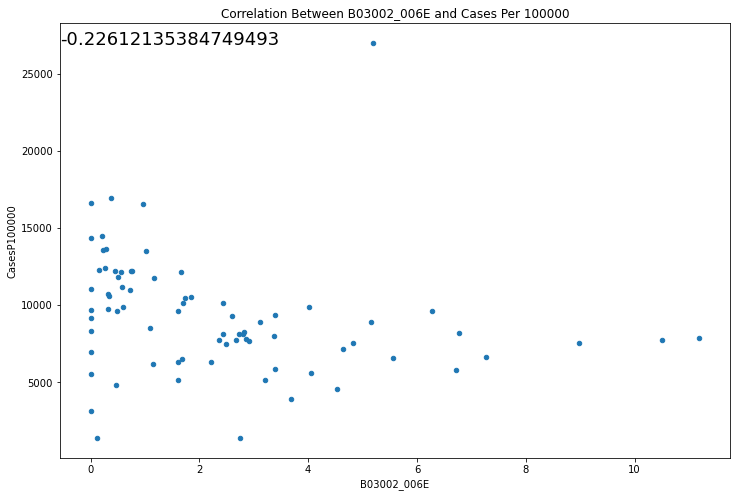

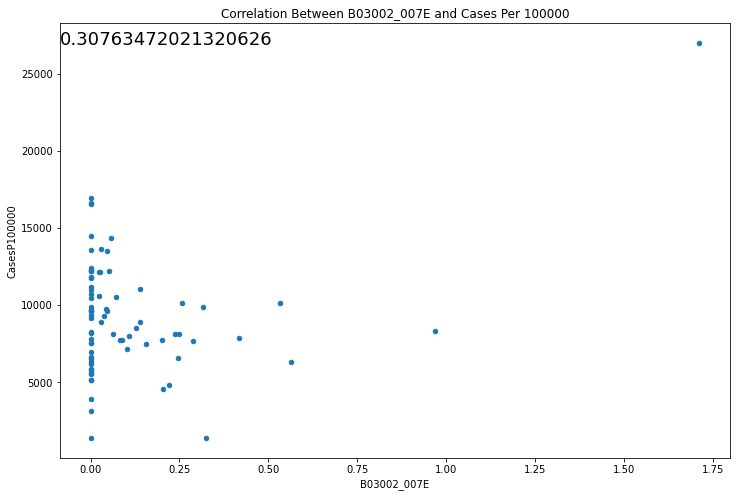

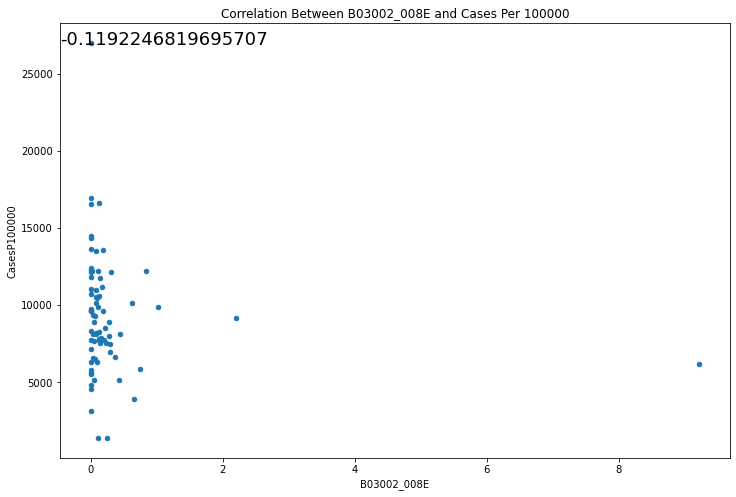

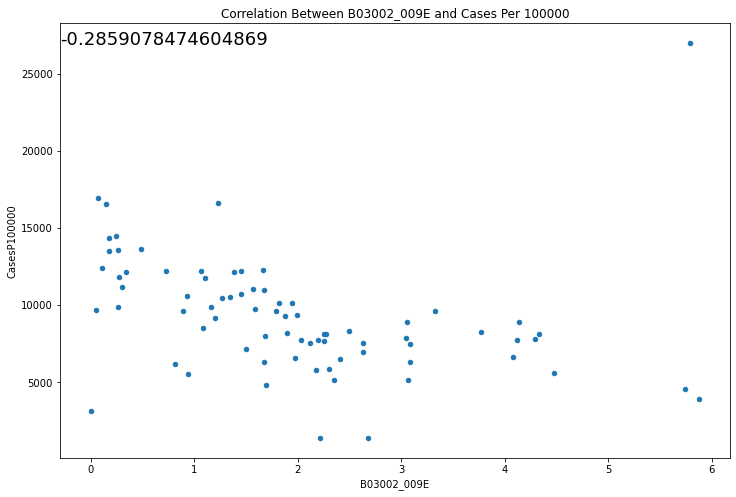

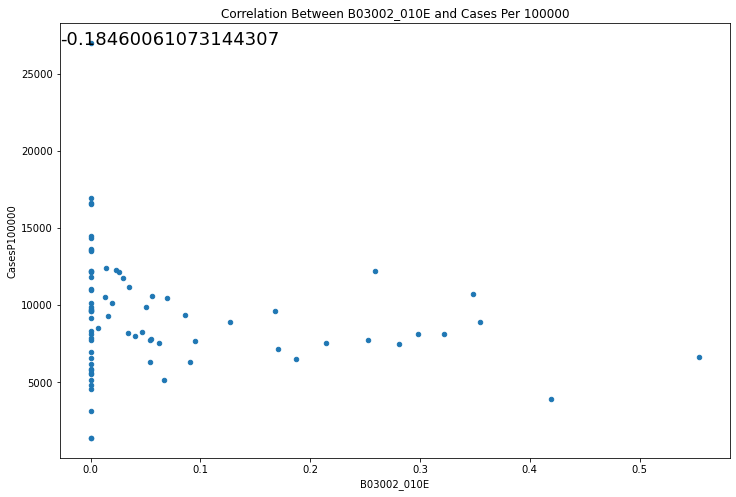

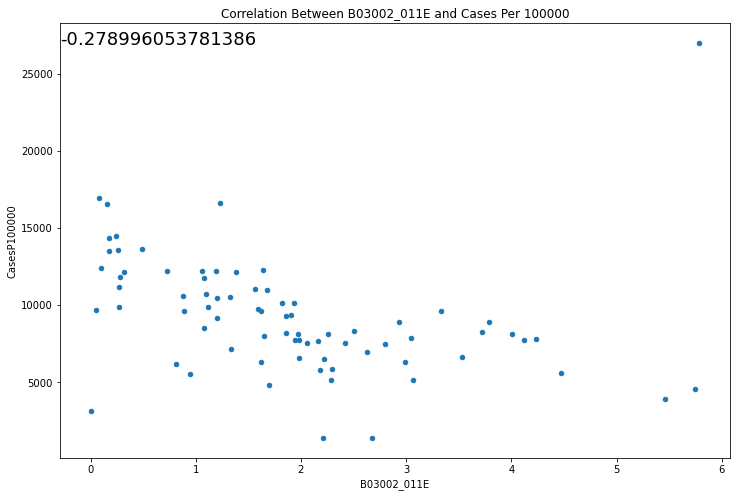

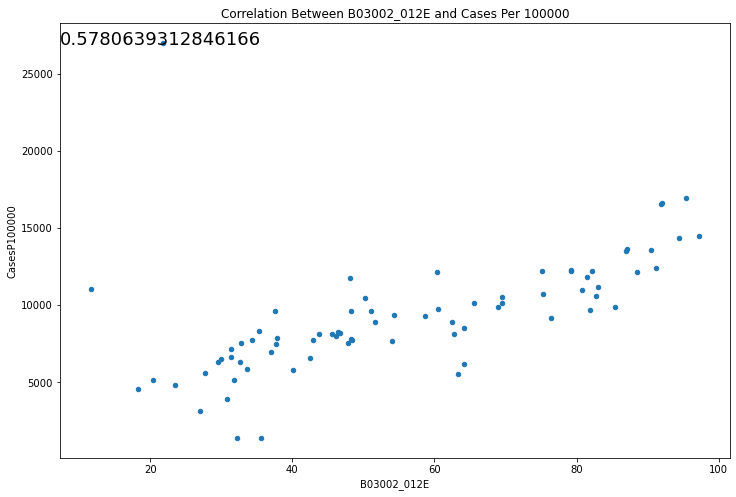

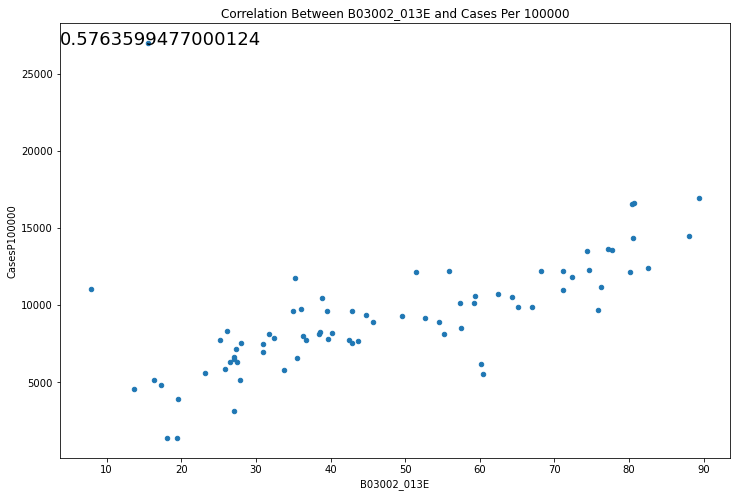

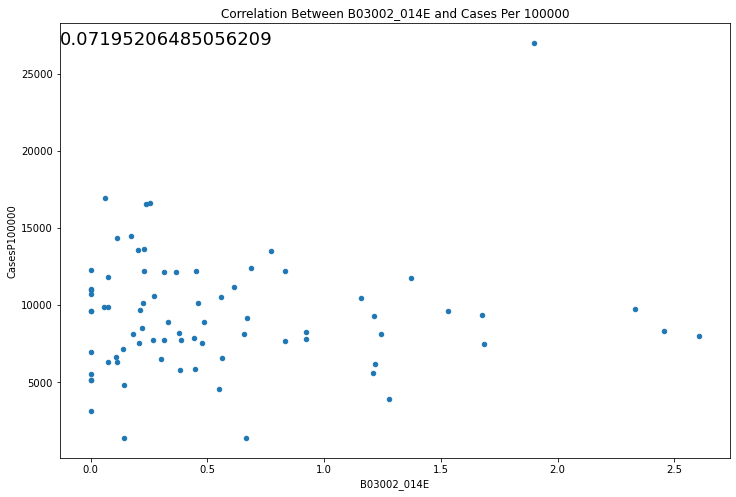

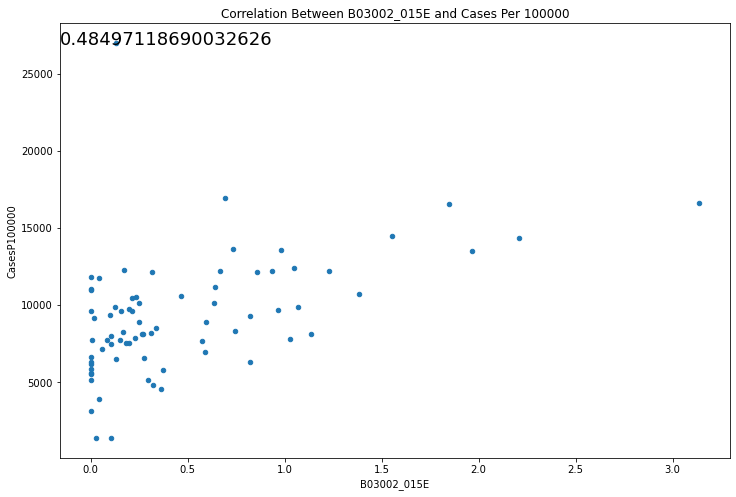

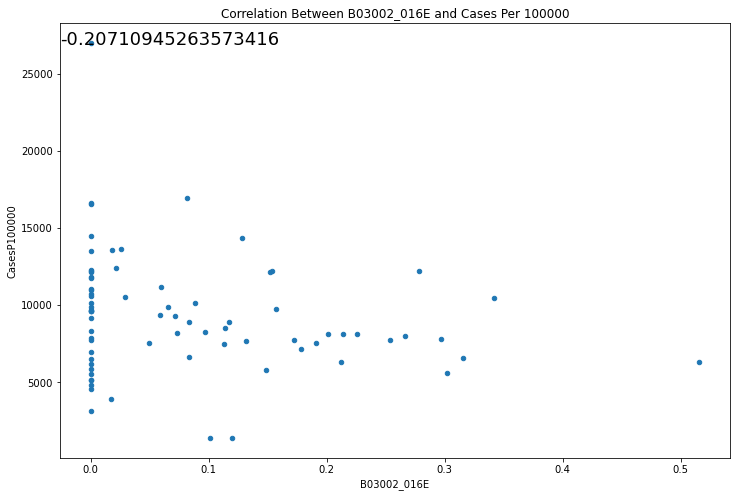

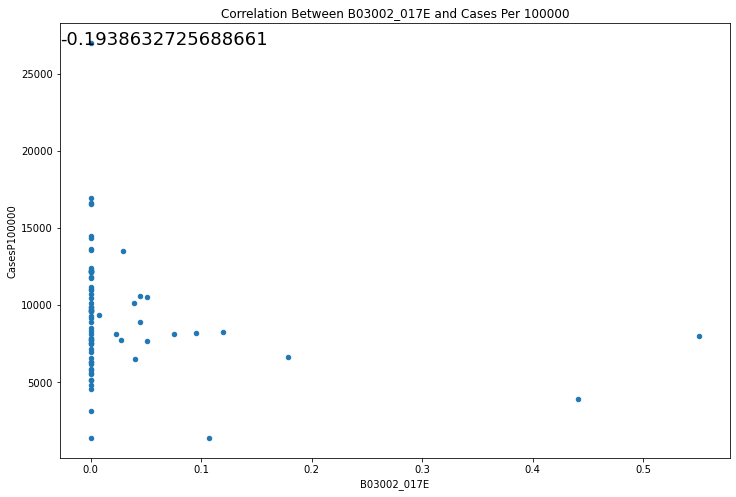

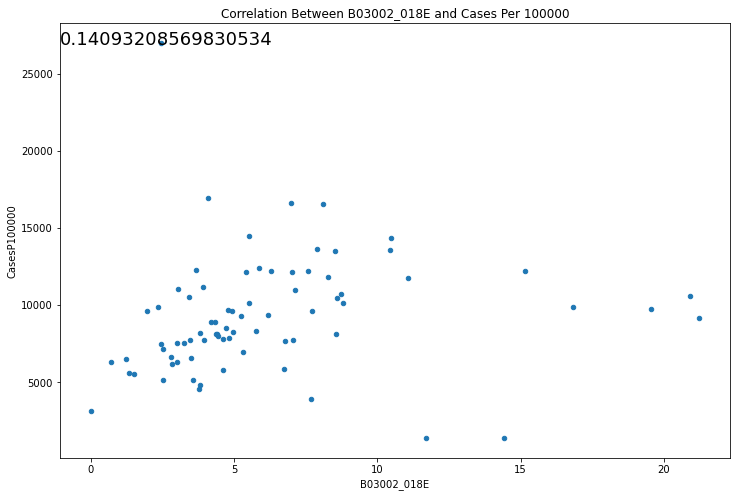

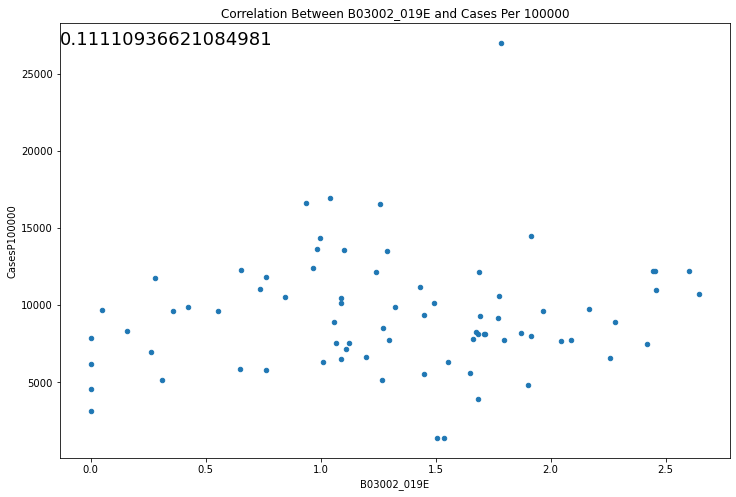

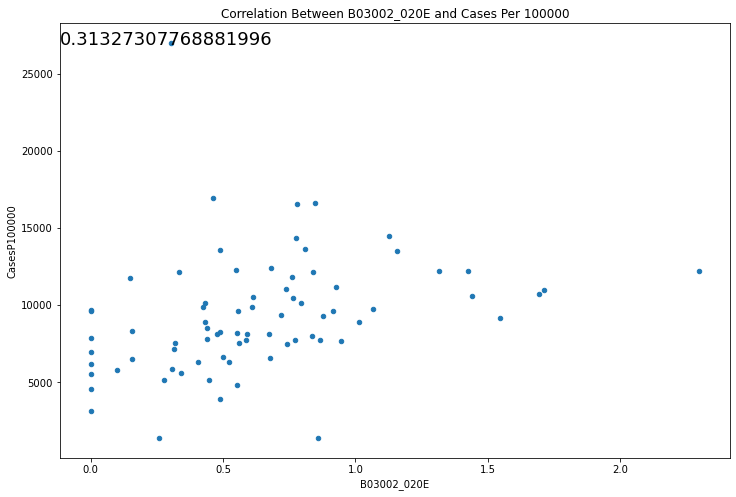

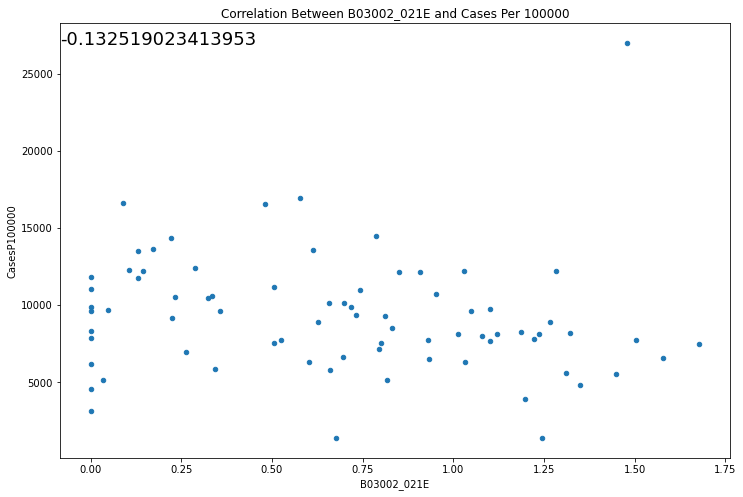

In [25]:
hispanic_list =['B03002_001E', 'B03002_002E', 'B03002_003E', 'B03002_004E',
       'B03002_005E', 'B03002_006E', 'B03002_007E', 'B03002_008E',
       'B03002_009E', 'B03002_010E', 'B03002_011E', 'B03002_012E',
       'B03002_013E', 'B03002_014E', 'B03002_015E', 'B03002_016E',
       'B03002_017E', 'B03002_018E', 'B03002_019E', 'B03002_020E',
       'B03002_021E']
for element in hispanic_list:
    hispanicpercents.plot.scatter(element,"CasesP100000", figsize = (12,8),title=f'Correlation Between {element} and Cases Per 100000')
    correlation = st.pearsonr(hispanicpercents[element],
                                 hispanicpercents["CasesP100000"])
    plt.annotate(correlation[0],xy=(0,0.95),fontsize = 18,xycoords='axes fraction')

In [33]:
# Import income filters
abovemedian = pd.read_csv(r'abovemedian_filer').rename(columns={"ZIP_CODE":"ZipInt"})
belowmedian = pd.read_csv(r'belowmedian_filter').rename(columns={"ZIP_CODE":"ZipInt"})

#verift data import
display(abovemedian.head())
display(belowmedian.head())

#merge data left to filter by income
ethnicity_belowmedian = pd.merge(belowmedian,hispanicpercents, on="ZipInt",how="left")
ethnicity_abovemedian = pd.merge(abovemedian,hispanicpercents, on= 'ZipInt', how = 'left')

#verify results
display(ethnicity_abovemedian.head())
display(ethnicity_belowmedian.head())

,Unnamed: 0,ZipInt
0,1,78006
1,2,78015
2,3,78023
3,4,78052
4,7,78101


,Unnamed: 0,ZipInt
0,0,78002
1,5,78069
2,6,78073
3,10,78112
4,16,78201


,Unnamed: 0,ZipInt,B03002_001E,B03002_002E,B03002_003E,B03002_004E,B03002_005E,B03002_006E,B03002_007E,B03002_008E,...,state,OBJECTID,ZIP_CODE,populationtotals_totpop_cy,Positive,CasesP100000,ActiveCases,ActiveCaseRate,SHAPE_Length,SHAPE_Area
0,1,78006,36056.0,76.489350,73.263812,0.679499,0.158087,0.468715,0.221877,0.000000,...,48,2,78006,5243,278,4851.657941,3,52.356021,0.552725,0.005416
1,2,78015,15811.0,79.615458,71.899311,2.624755,0.000000,1.600152,0.000000,0.423756,...,48,4,78015,12254,664,5167.315175,7,54.474708,0.278955,0.002312
2,3,78023,31357.0,57.531014,46.777434,2.630991,0.312530,5.552189,0.245559,0.035080,...,48,5,78023,29569,1947,6588.163638,15,50.756268,0.886455,0.017922
3,4,78052,6769.0,36.681932,35.692126,0.000000,0.044320,0.000000,0.000000,0.000000,...,48,7,78052,699,39,5555.555556,3,427.350427,0.260085,0.001147
4,7,78101,6465.0,62.938902,59.613302,0.402166,0.000000,0.000000,0.000000,0.293890,...,48,14,78101,4485,311,6999.774927,1,22.507315,0.543172,0.006502


,Unnamed: 0,ZipInt,B03002_001E,B03002_002E,B03002_003E,B03002_004E,B03002_005E,B03002_006E,B03002_007E,B03002_008E,...,state,OBJECTID,ZIP_CODE,populationtotals_totpop_cy,Positive,CasesP100000,ActiveCases,ActiveCaseRate,SHAPE_Length,SHAPE_Area
0,0,78002,6833.0,18.527733,16.991073,0.526855,0.219523,0.512220,0.0,0.000000,...,48,1,78002,9061,1063,11816.362830,6,66.696309,0.427542,0.009546
1,5,78069,6115.0,18.135732,17.432543,0.130826,0.523303,0.000000,0.0,0.000000,...,48,12,78069,2290,225,9723.422645,0,0.000000,0.254859,0.002041
2,6,78073,8580.0,20.850816,17.412587,1.515152,0.093240,0.163170,0.0,0.000000,...,48,13,78073,7312,920,12273.212380,2,26.680896,0.580798,0.011685
3,10,78112,8617.0,24.776604,22.165487,0.696298,0.139260,0.324939,0.0,0.000000,...,48,17,78112,8791,945,10716.715810,6,68.042640,0.542672,0.011408
4,16,78201,48334.0,17.062523,13.659122,2.191004,0.153101,0.581371,0.0,0.173791,...,48,27,78201,45977,5058,11207.374090,33,73.120472,0.247549,0.001721


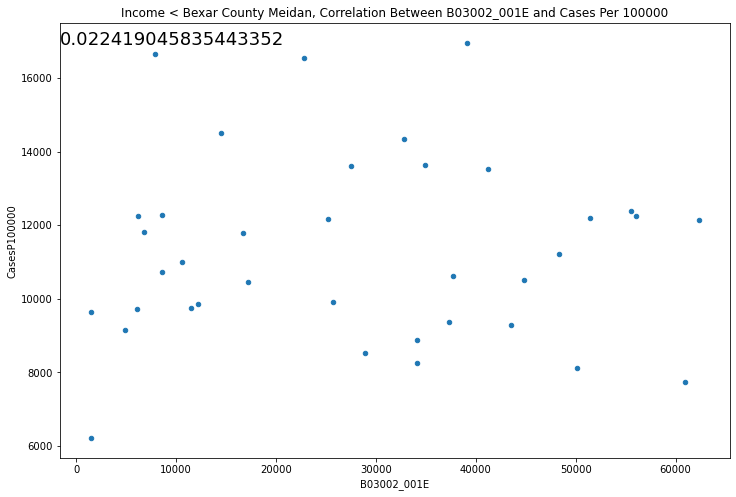

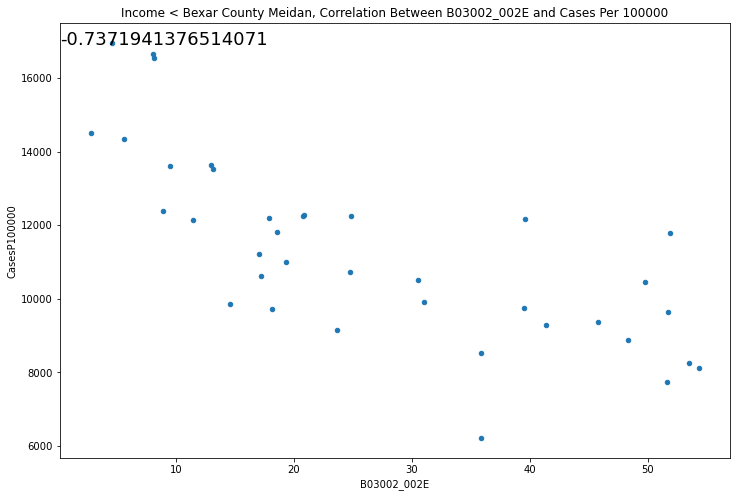

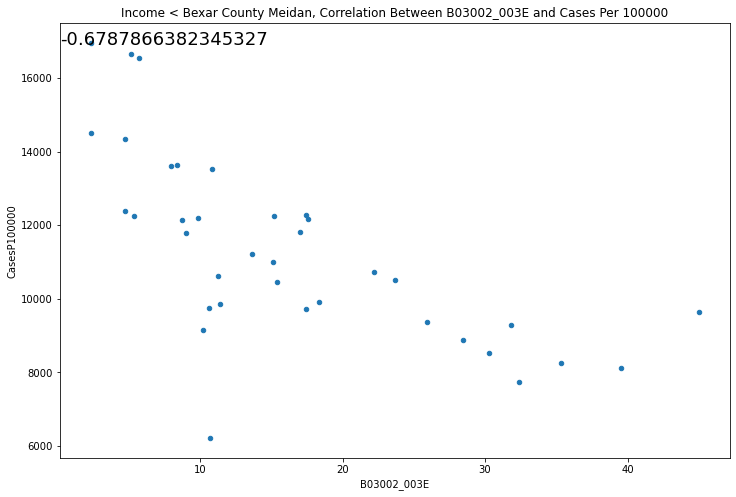

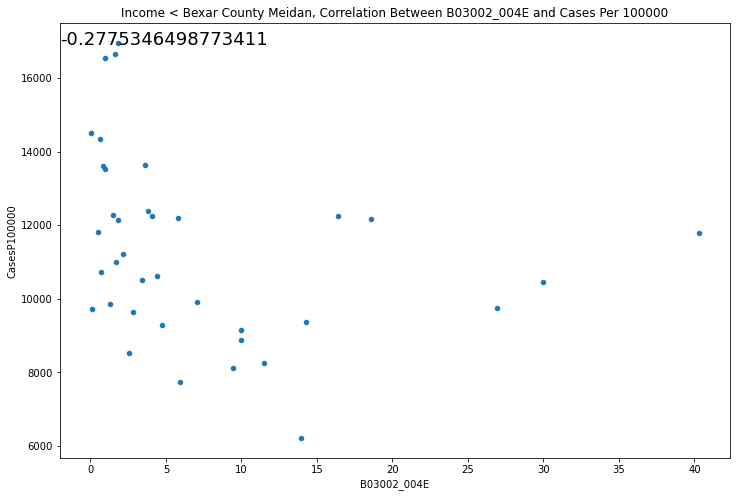

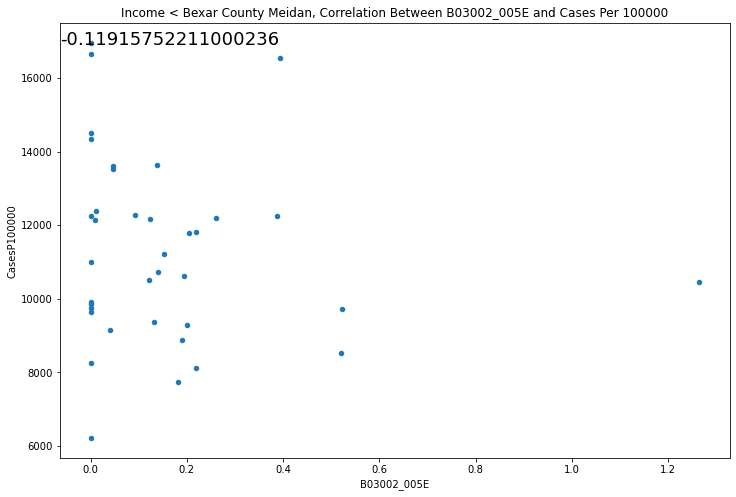

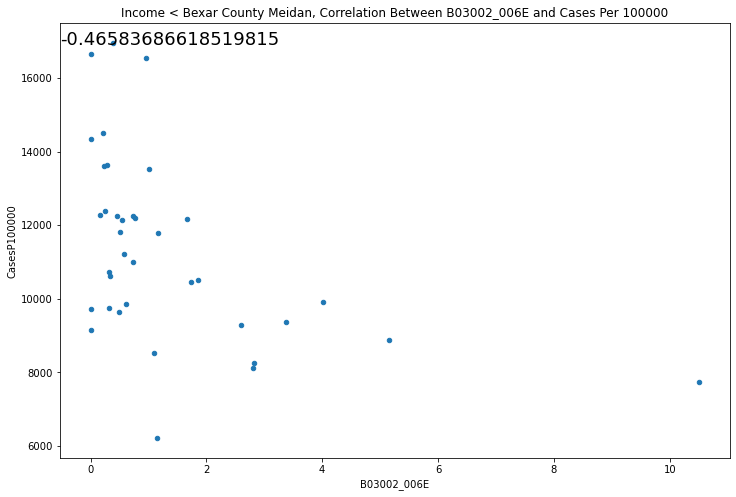

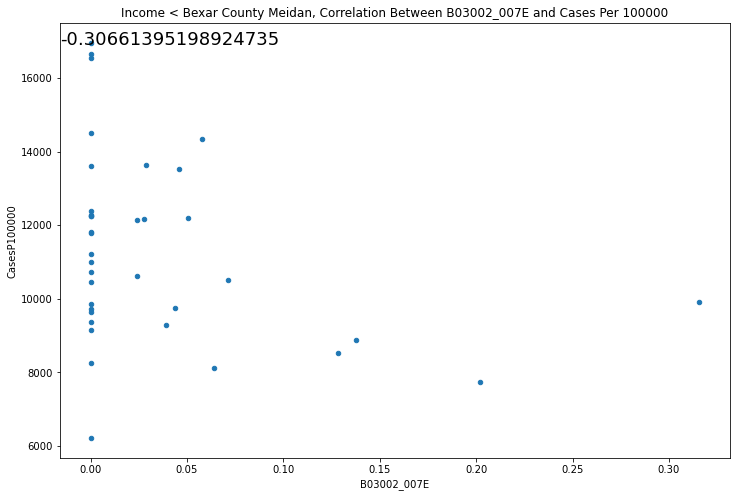

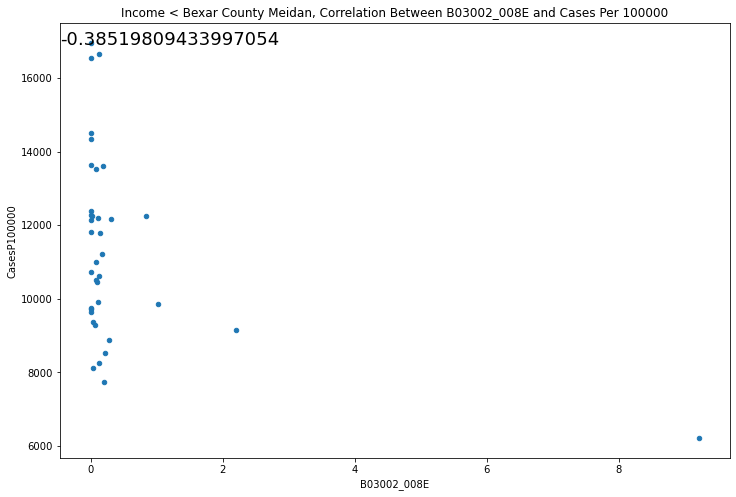

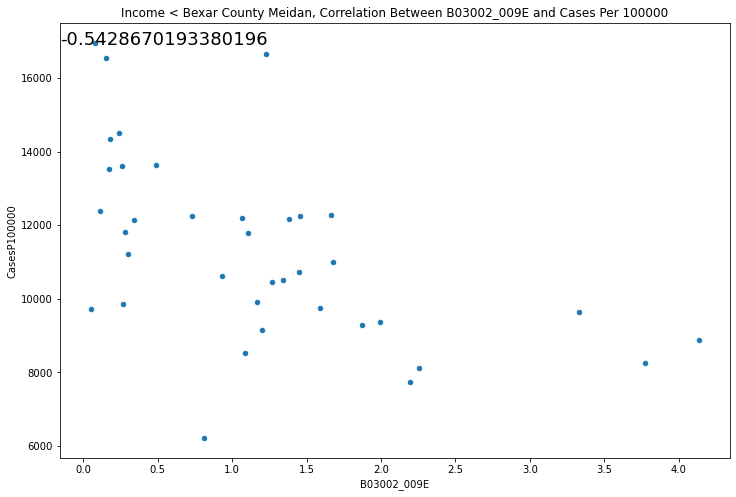

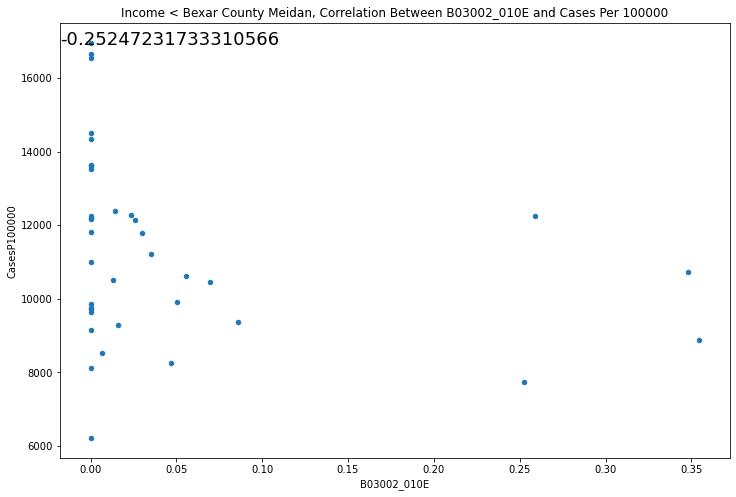

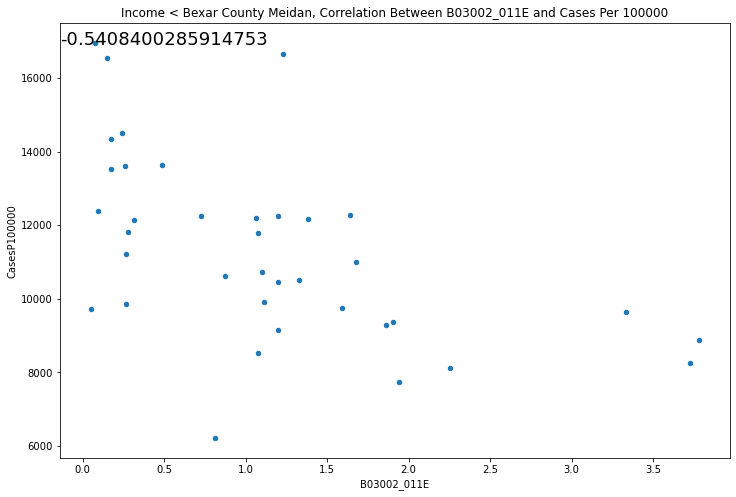

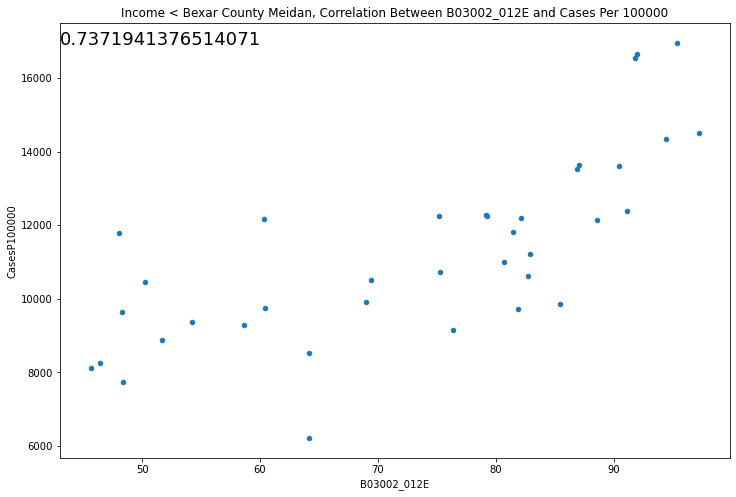

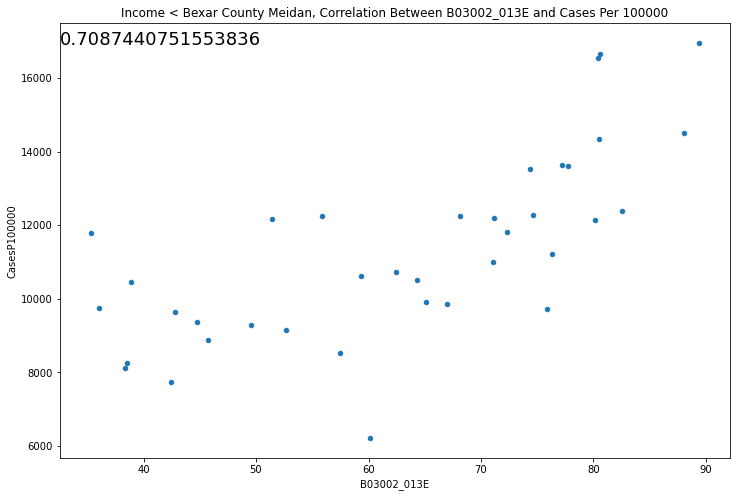

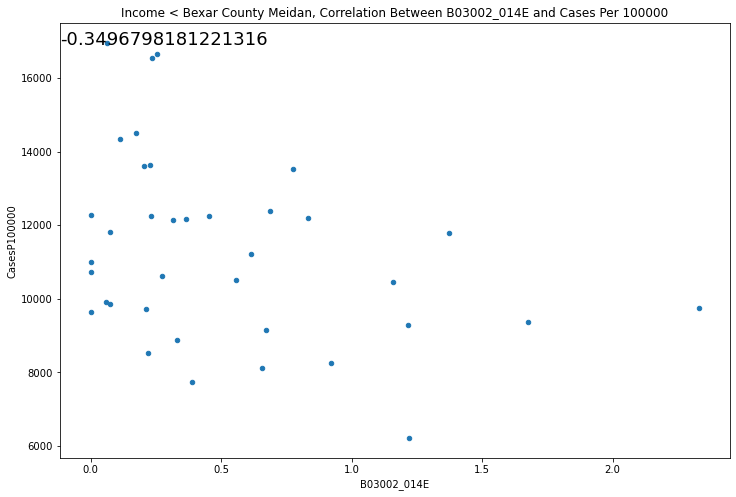

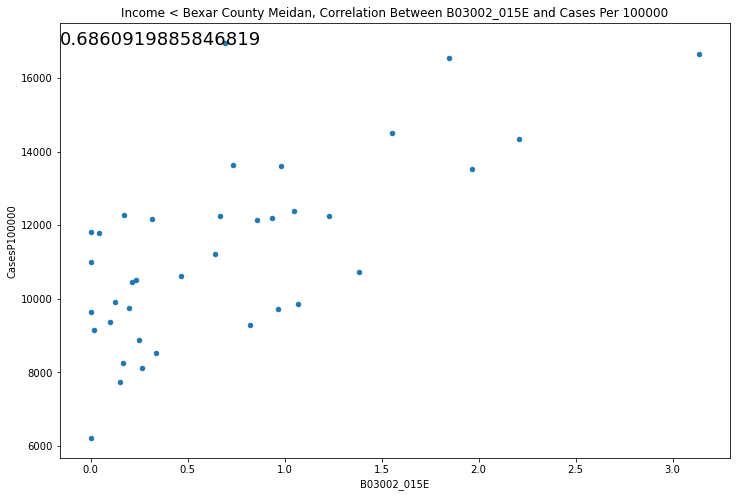

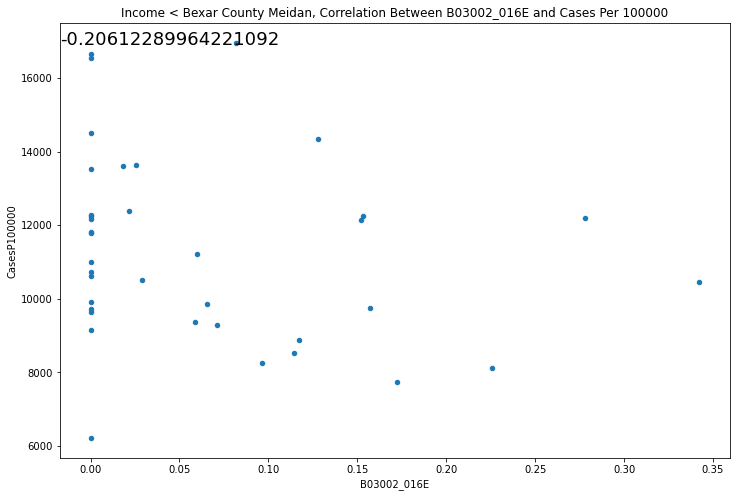

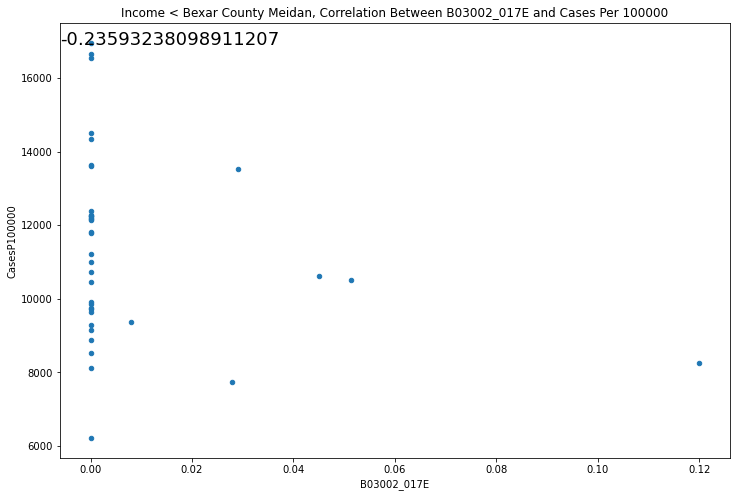

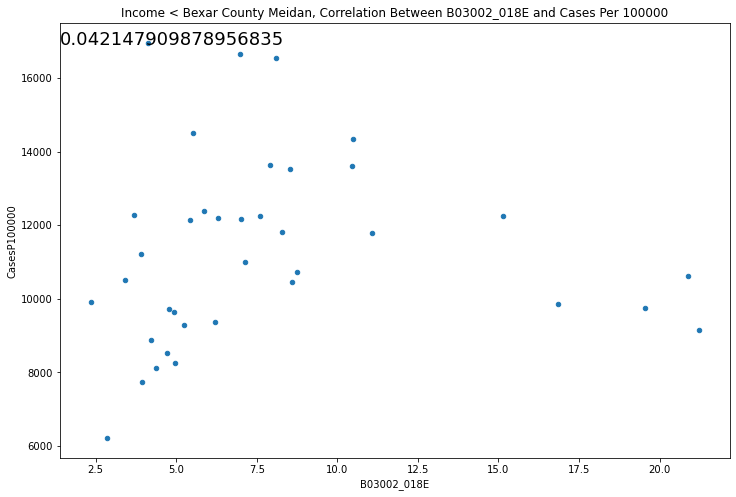

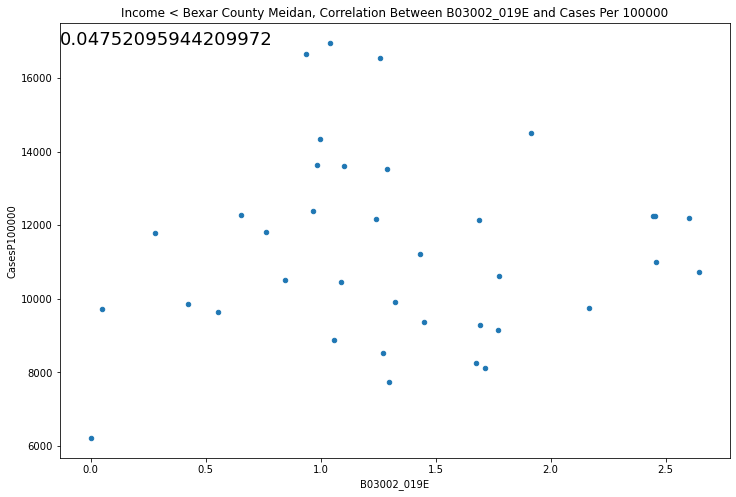

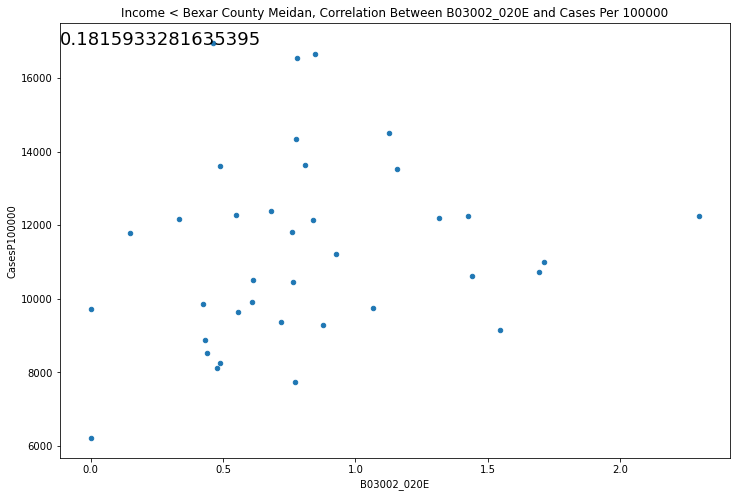

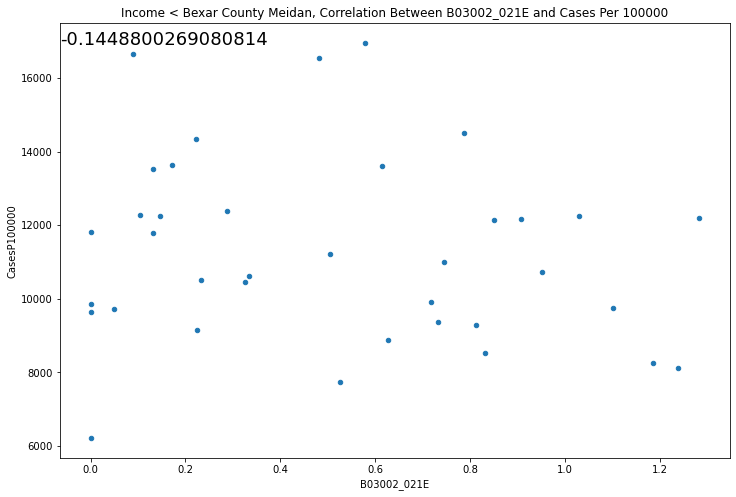

In [35]:
#Scatter plots for zipcodes below median income
hispanic_list =['B03002_001E', 'B03002_002E', 'B03002_003E', 'B03002_004E',
       'B03002_005E', 'B03002_006E', 'B03002_007E', 'B03002_008E',
       'B03002_009E', 'B03002_010E', 'B03002_011E', 'B03002_012E',
       'B03002_013E', 'B03002_014E', 'B03002_015E', 'B03002_016E',
       'B03002_017E', 'B03002_018E', 'B03002_019E', 'B03002_020E',
       'B03002_021E']
for element in hispanic_list:
    ethnicity_belowmedian.plot.scatter(element,"CasesP100000", figsize = (12,8),title=f'Income < Bexar County Meidan, Correlation Between {element} and Cases Per 100000')
    correlation = st.pearsonr(ethnicity_belowmedian[element],
                                 ethnicity_belowmedian["CasesP100000"])
    plt.annotate(correlation[0],xy=(0,0.95),fontsize = 18,xycoords='axes fraction')

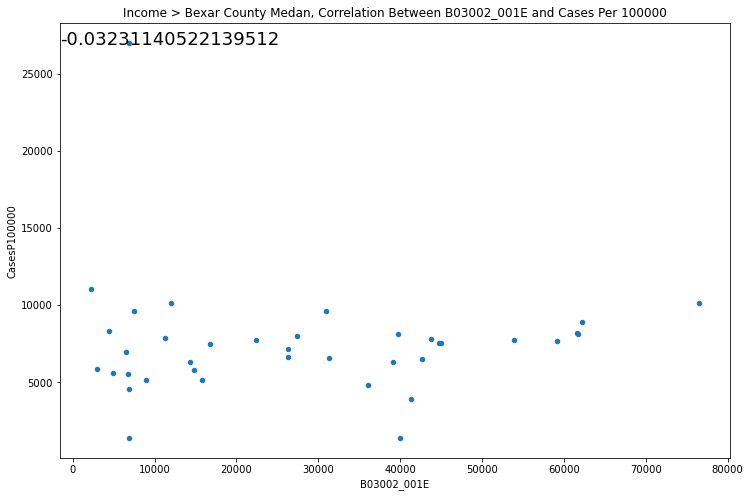

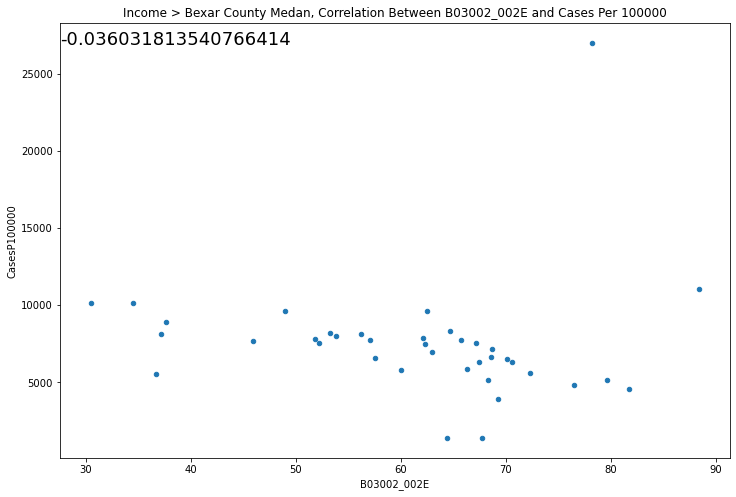

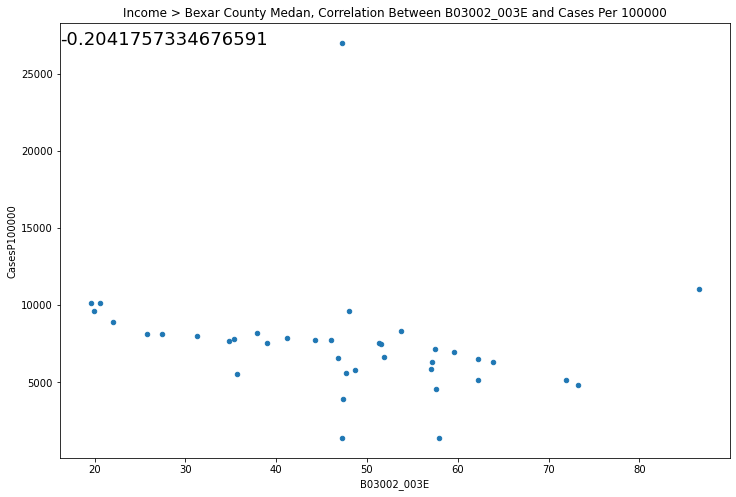

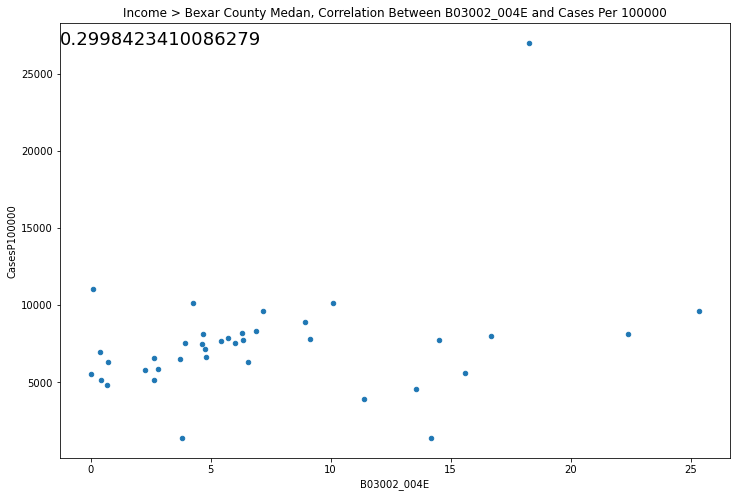

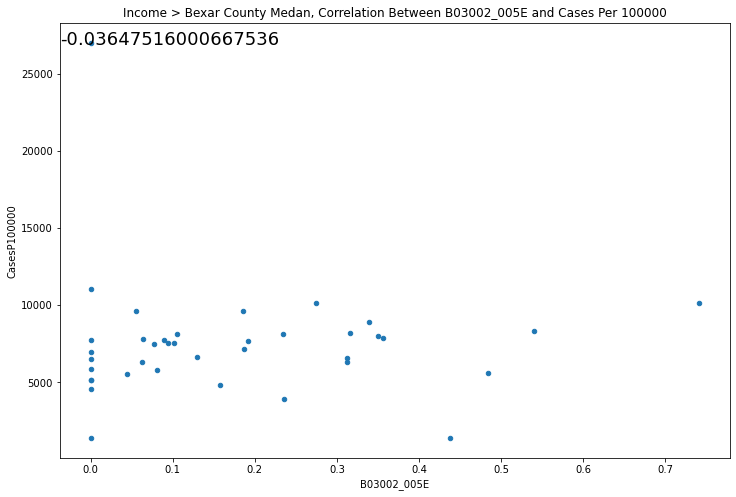

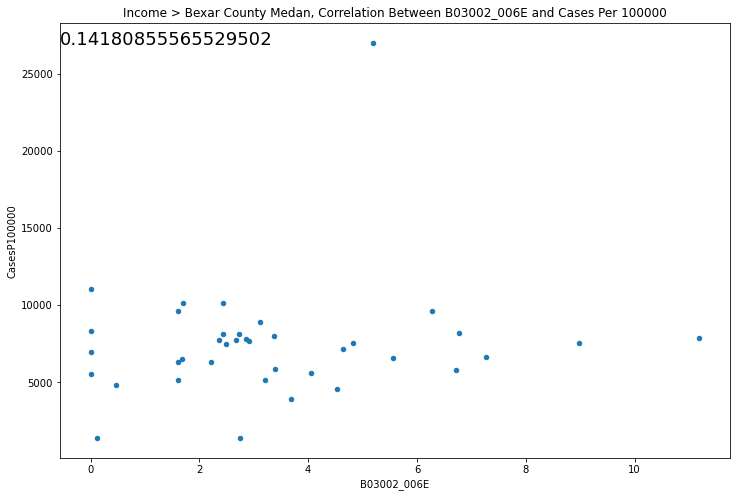

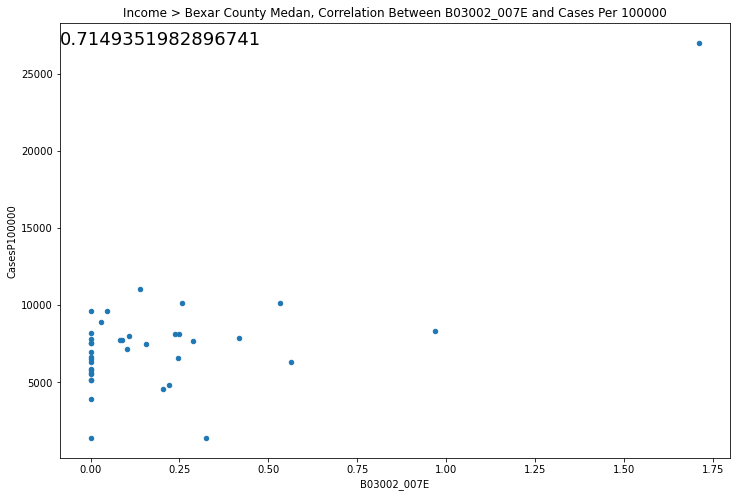

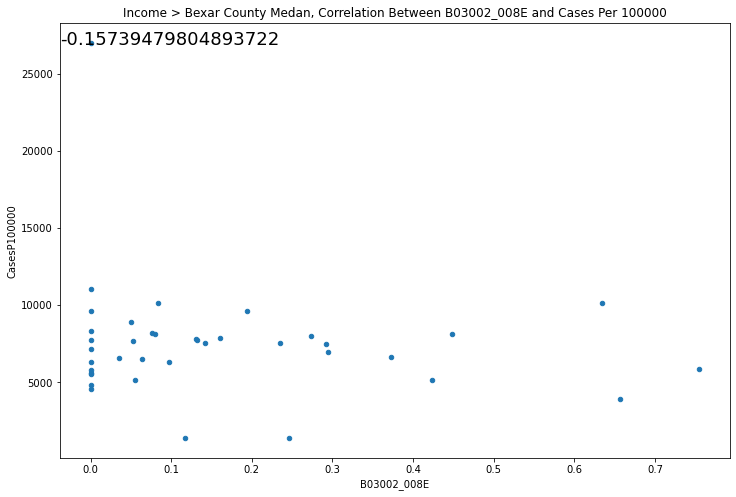

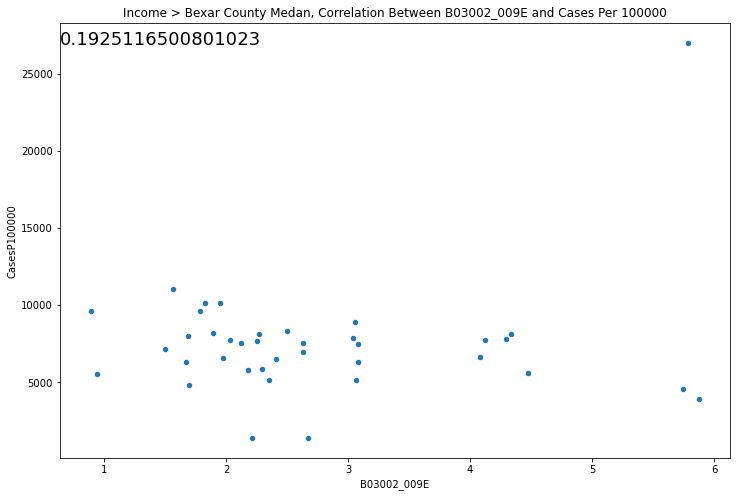

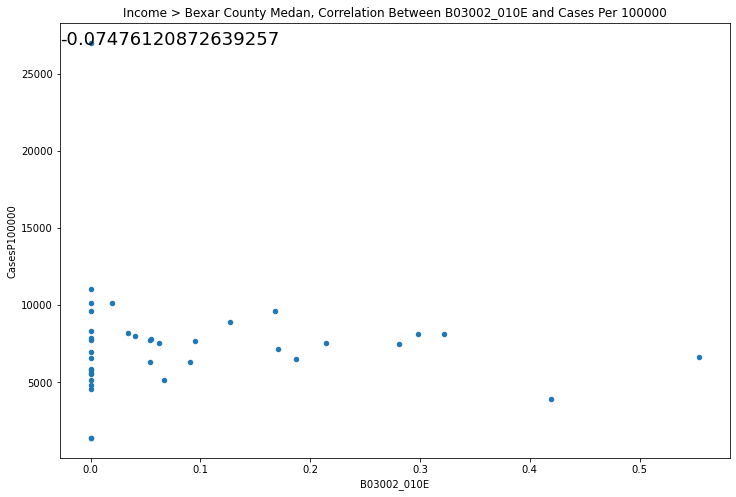

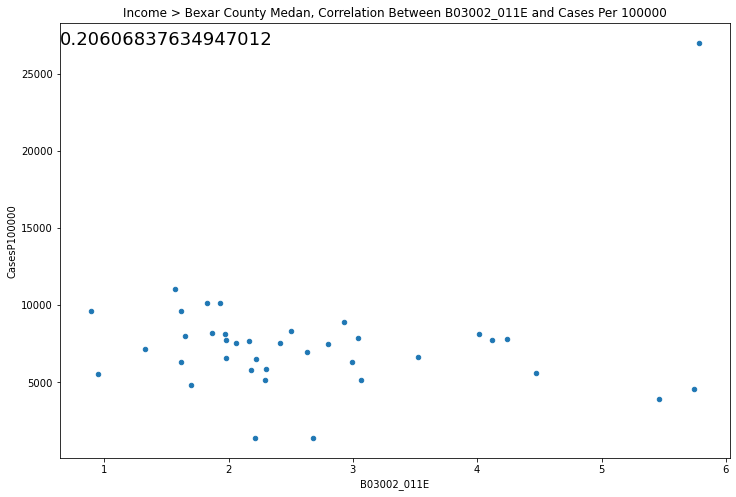

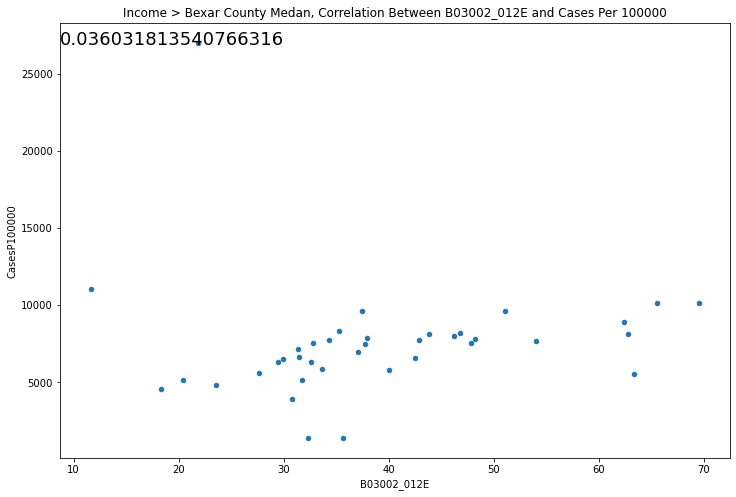

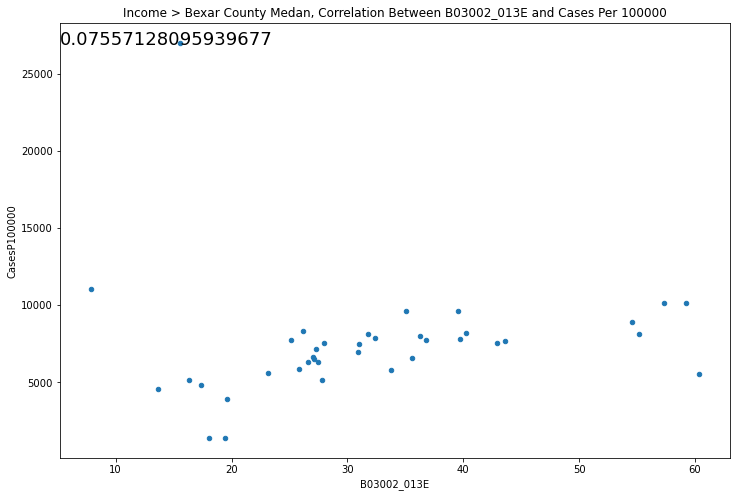

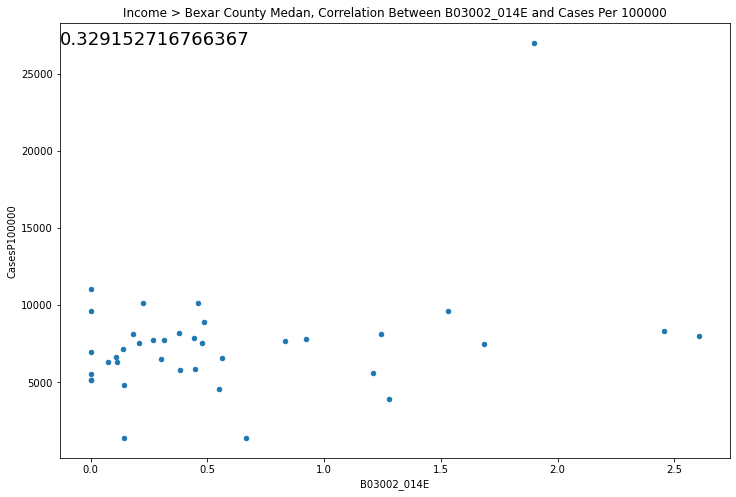

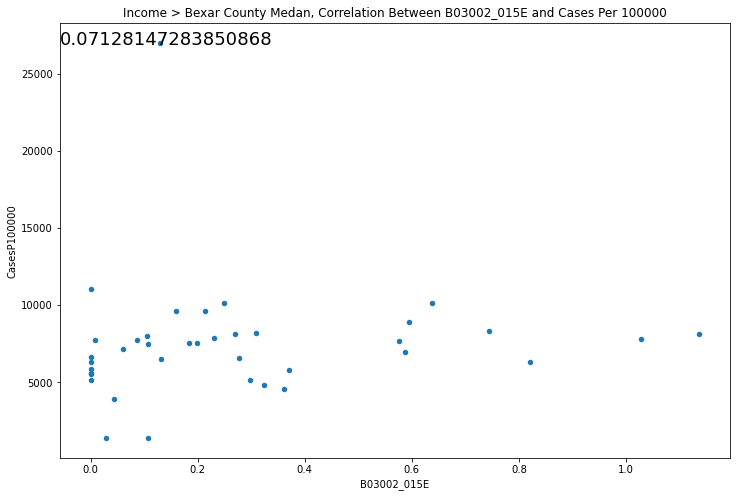

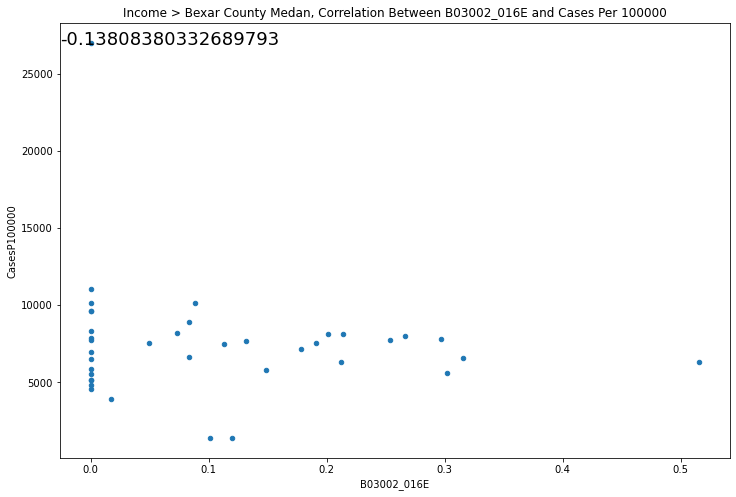

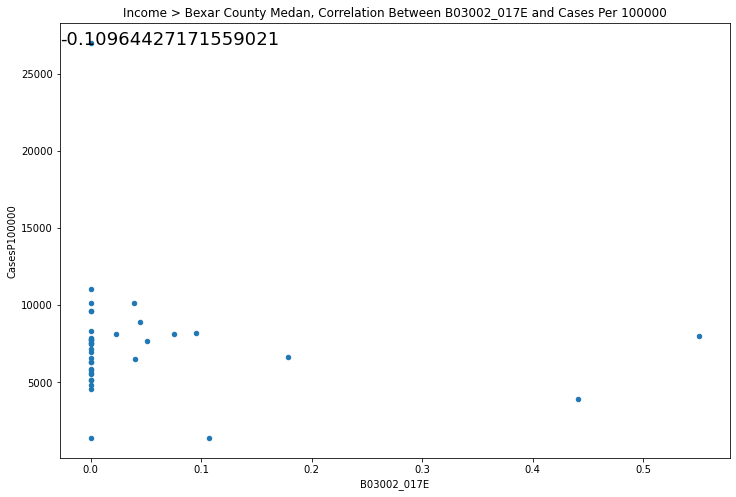

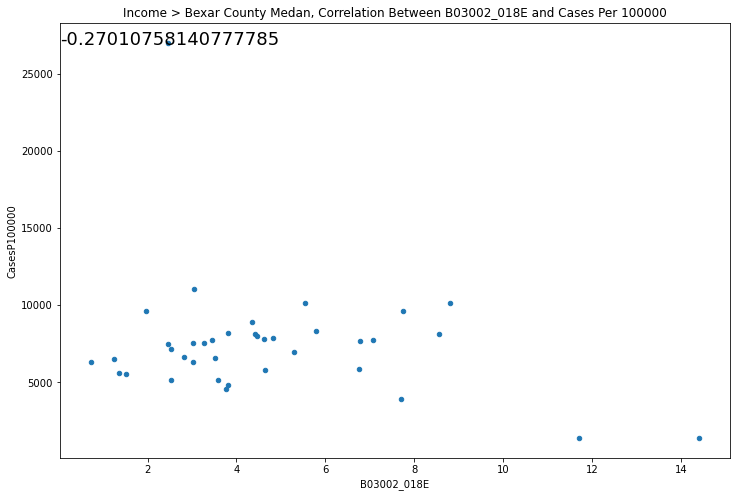

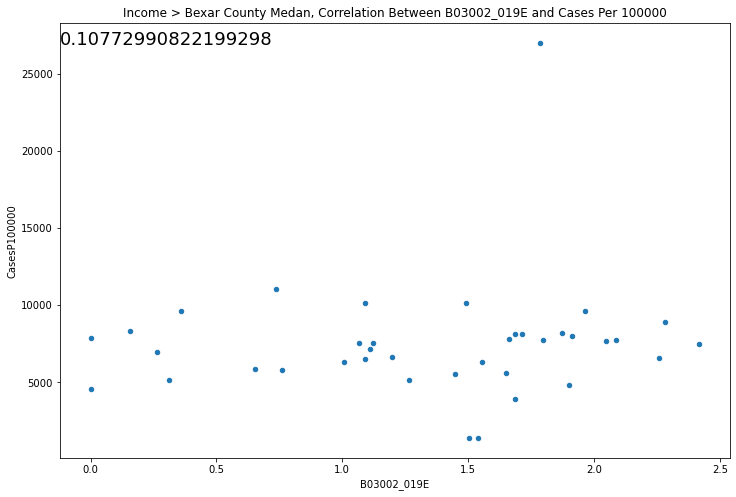

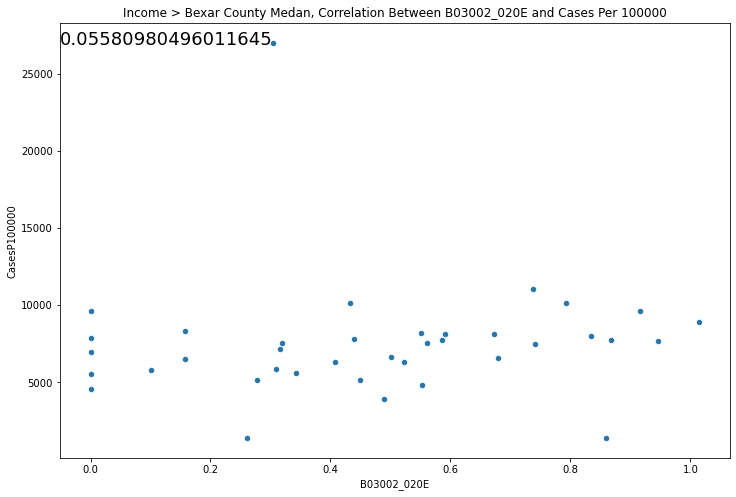

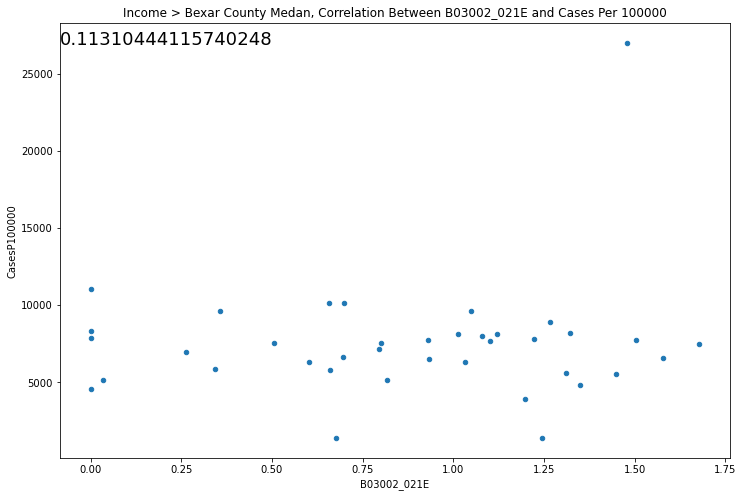

In [36]:
#Scatter plots for zipcodes above median income
hispanic_list =['B03002_001E', 'B03002_002E', 'B03002_003E', 'B03002_004E',
       'B03002_005E', 'B03002_006E', 'B03002_007E', 'B03002_008E',
       'B03002_009E', 'B03002_010E', 'B03002_011E', 'B03002_012E',
       'B03002_013E', 'B03002_014E', 'B03002_015E', 'B03002_016E',
       'B03002_017E', 'B03002_018E', 'B03002_019E', 'B03002_020E',
       'B03002_021E']
for element in hispanic_list:
    ethnicity_abovemedian.plot.scatter(element,"CasesP100000", figsize = (12,8),title=f'Income > Bexar County Medan, Correlation Between {element} and Cases Per 100000')
    correlation = st.pearsonr(ethnicity_abovemedian[element],
                                 ethnicity_abovemedian["CasesP100000"])
    plt.annotate(correlation[0],xy=(0,0.95),fontsize = 18,xycoords='axes fraction')

In [ ]:
#Scatter plots for zipcodes below median income
hispanic_list =[ 'B03002_012E']
for element in hispanic_list:
    ethnicity_belowmedian.plot.scatter(element,"CasesP100000", figsize = (12,8),
                                       title=f'Income < Bexar County Meidan, Correlation Between {element} and Cases Per 100000')
    correlation = st.pearsonr(ethnicity_belowmedian[element],
                                 ethnicity_belowmedian["CasesP100000"])
    plt.annotate(correlation[0],xy=(0,0.95),fontsize = 18,xycoords='axes fraction')